# Supply Chain Management

**OBJECTIVE:** Analyzing the FMCG dataset is to develop focused strategies for optimizing supply quantities in each warehouse. By conducting thorough data exploration and analysis, the aim is to discern patterns and insights that guide the identification and implementation of efficient supply quantity decisions, thereby enhancing overall operational efficiency within the Fast-Moving Consumer Goods (FMCG) company.

### About Dataset

This dataset contains comprehensive information related to the instant noodles business of a leading FMCG company.
The columns in the dataset include:

* Ware_house_ID: Unique identifiers for each warehouse.
* WH_Manager_ID: Unique identifiers for the warehouse managers.
* Location_type: Indicates the type of location where each warehouse is situated.
* WH_capacity_size: Represents the capacity or size of each warehouse.
* zone: Categorizes the warehouses into specific zones.
* WH_regional_zone: Assigns each warehouse to a regional zone.
* num_refill_req_l3m: Records the number of refill requests received in the last 3 months.
* transport_issue_l1y: Indicates the occurrence of any transport-related issues within the last year.
* Competitor_in_mkt: Specifies the presence of competitors in the market.
* retail_shop_num: Provides the number of retail shops associated with each warehouse.
* wh_owner_type: Describes the ownership type of each warehouse.
* distributor_num: Represents the number of distributors associated with each warehouse.
* flood_impacted: Indicates whether a warehouse has been impacted by floods.
* flood_proof: Specifies whether a warehouse is flood-proof.
* electric_supply: Indicates the status of electric supply to each warehouse.
* dist_from_hub: Represents the distance of each warehouse from the hub.
* workers_num: Provides the number of workers employed at each warehouse.
* wh_est_year: Represents the year in which each warehouse was established.
* storage_issue_reported_l3m: Indicates whether any storage issues have been reported in the last 3 months.
* temp_reg_mach: Specifies the presence of temperature regulation machinery at each warehouse.
* approved_wh_govt_certificate: Indicates if each warehouse has an approved government certificate.
* wh_breakdown_l3m: Indicates whether any breakdowns have occurred at each warehouse in the last 3 months.
* govt_check_l3m: Indicates if government checks have been conducted for each warehouse in the last 3 months.
* product_wg_ton: Represents the weight of the product in tons.



In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
import os,sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df=pd.read_csv(r"C:\Users\reshm\OneDrive\Desktop\project\Supply chain Management\Supply chain Management\Data.csv")

In [3]:
df

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0         WH_100000     EID_50000         Urban            Small   West   
1         WH_100001     EID_50001         Rural            Large  North   
2         WH_100002     EID_50002         Rural              Mid  South   
3         WH_100003     EID_50003         Rural              Mid  North   
4         WH_100004     EID_50004         Rural            Large  North   
...             ...           ...           ...              ...    ...   
24995     WH_124995     EID_74995         Rural            Small  North   
24996     WH_124996     EID_74996         Rural              Mid   West   
24997     WH_124997     EID_74997         Urban            Large  South   
24998     WH_124998     EID_74998         Rural            Small  North   
24999     WH_124999     EID_74999         Rural              Mid   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0               Zone 6                   3                    1   
1               Zone 5                   0                    0   
2               Zone 2                   1                    0   
3               Zone 3                   7                    4   
4               Zone 5                   3                    1   
...                ...                 ...                  ...   
24995           Zone 1                   3                    0   
24996           Zone 2                   6                    0   
24997           Zone 5                   7                    0   
24998           Zone 1                   1                    0   
24999           Zone 4                   8                    2   

       Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                      2             4651  ...               1             91   
1                      4             6217  ...               1            210   
2                      4             4306  ...               0            161   
3                      2             6000  ...               0            103   
4                      2             4740  ...               1            112   
...                  ...              ...  ...             ...            ...   
24995                  4             5390  ...               1            142   
24996                  4             4490  ...               1            130   
24997                  2             5403  ...               1            147   
24998                  2            10562  ...               1             60   
24999                  4             5664  ...               1            239   

       workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0             29.0          NaN                          13              0   
1             31.0          NaN                           4              0   
2             37.0          NaN                          17              0   
3             21.0          NaN                          17              1   
4             25.0       2009.0                          18              0   
...            ...          ...                         ...            ...   
24995         34.0       2005.0                          22              1   
24996         28.0       2012.0                          10              0   
24997          NaN          NaN                          23              0   
24998         25.0          NaN                          18              0   
24999         39.0       2019.0                           4              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                                 A                 5              15   
1                                 A                 3              17   
2                                 A                 6              22   
3                                A+                 3              27   
4                        

In [4]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


### Data Preprocessing

In [5]:


def missing_values(dataframe):
    total_missing = dataframe.isnull().sum()
    percentage_missing = (total_missing / len(dataframe)) * 100

    missing_values_df = pd.DataFrame({
        'Column': total_missing.index,
        'Missing Values': total_missing.values,
        'Percentage': percentage_missing.values
    })

    missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]  # Filter columns with missing values
    missing_values_df = missing_values_df.sort_values(by='Percentage', ascending=False)

    # Resetting the index and dropping the old index
    missing_values_df = missing_values_df.reset_index(drop=True)

    # Keep only the required columns
    missing_values_df = missing_values_df[['Column', 'Missing Values', 'Percentage']]

    return missing_values_df



In [6]:
import pandas as pd
from termcolor import colored  # Install this package using: pip install termcolor

def explore_data(df):
    """
    Explore and display various information about a pandas DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - None (prints information)
    
    """
    df.columns = df.columns.str.lower()
    # Display shape of the DataFrame
    print(f"Shape of DataFrame: {df.shape}\n")
    print("\n" + colored('-'*80, 'red') + "\n")

    # Display information about the DataFrame
    print("Info about DataFrame:")
    print(df.info())
    print("\n" + colored('-'*80, 'red') + "\n")


    # Display nunique in each column
    # Display number of unique values in each column
    print("Number of unique values (nunique) in each column:")
    for column in df.columns:
        num_unique = df[column].nunique()
        print(f"{column}:{num_unique}")

    print("\n" + colored('-'*80, 'red') + "\n")

   # Display duplicated values
    print("Number of duplicates:")
    print(df.duplicated().sum())
    print("\n" + colored('-'*80, 'red') + "\n")

    # Display missing values
    print('Missing value info:')
    df_missing_values = missing_values(df)
    print(df_missing_values)

    print("\n" + colored('-'*80, 'red') + "\n")

    # Descriptive statistics for numerical variables
    print("Descriptive Statistics for Numerical Variables:")
    print(df.describe())

    print("\n" + colored('-'*80, 'red') + "\n")



    # Descriptive statistics for categorical variables
    print("Descriptive Statistics for Categorical Variables:")
    print(df.describe(include='O'))  # 'O' includes object (categorical) variables
    print("\n" + colored('-'*80, 'red') + "\n")

    
# Example usage:
# Assuming df is your DataFrame
explore_data(df)


Shape of DataFrame: (25000, 24)


--------------------------------------------------------------------------------

Info about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ware_house_id                 25000 non-null  object 
 1   wh_manager_id                 25000 non-null  object 
 2   location_type                 25000 non-null  object 
 3   wh_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   wh_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-

In [7]:
df.columns


Index(['ware_house_id', 'wh_manager_id', 'location_type', 'wh_capacity_size',
       'zone', 'wh_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [8]:

# Assuming 'df' is your DataFrame
value_counts_per_column = {}

for column in df.columns:
    value_counts_per_column[column] = df[column].value_counts()

# If you want to display the results
for column, value_counts in value_counts_per_column.items():
    print(f"\nValue counts for '{column}':\n{value_counts}")



Value counts for 'ware_house_id':
WH_100000    1
WH_116650    1
WH_116672    1
WH_116671    1
WH_116670    1
            ..
WH_108331    1
WH_108330    1
WH_108329    1
WH_108328    1
WH_124999    1
Name: ware_house_id, Length: 25000, dtype: int64

Value counts for 'wh_manager_id':
EID_50000    1
EID_66650    1
EID_66672    1
EID_66671    1
EID_66670    1
            ..
EID_58331    1
EID_58330    1
EID_58329    1
EID_58328    1
EID_74999    1
Name: wh_manager_id, Length: 25000, dtype: int64

Value counts for 'location_type':
Rural    22957
Urban     2043
Name: location_type, dtype: int64

Value counts for 'wh_capacity_size':
Large    10169
Mid      10020
Small     4811
Name: wh_capacity_size, dtype: int64

Value counts for 'zone':
North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

Value counts for 'wh_regional_zone':
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: wh_regional_zone, dtype: int64

Value 

## EDA

In [9]:
df[['flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach']] = df[['flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach']].astype('O')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ware_house_id                 25000 non-null  object 
 1   wh_manager_id                 25000 non-null  object 
 2   location_type                 25000 non-null  object 
 3   wh_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   wh_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  object 
 13  f

###### In which region the ware houses are more

In [11]:
df['zone'].value_counts()   #zone wise ware house count

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

In [12]:
region_zone_df=df.groupby(['zone','wh_regional_zone'],as_index=False)['ware_house_id'].count()
region_zone_df.columns = ["zone", "wh regional zone", "no of wh"]

region_zone_df["total warehouses"] = region_zone_df.groupby("wh regional zone")["no of wh"].transform("sum")

region_zone_df["percentage"] = round((region_zone_df["no of wh"]/region_zone_df["total warehouses"])*100,2)

region_zone_df.sort_values(by="percentage", ascending=False, inplace=True)

In [13]:
region_zone_df

zone wh regional zone  no of wh  total warehouses  percentage
10  North           Zone 6      4519              8339       54.19
12  South           Zone 2      1444              2963       48.73
20   West           Zone 4      1966              4176       47.08
9   North           Zone 5      1917              4587       41.79
5   North           Zone 1       841              2054       40.94
7   North           Zone 3       961              2881       33.36
11  South           Zone 1       680              2054       33.11
21   West           Zone 5      1489              4587       32.46
19   West           Zone 3       923              2881       32.04
13  South           Zone 3       885              2881       30.72
6   North           Zone 2       854              2963       28.82
22   West           Zone 6      2398              8339       28.76
8   North           Zone 4      1186              4176       28.40
15  South           Zone 5      1107              4587       24.13
17   West           Zone 1       490              2054       23.86
18   West           Zone 2       665              2963       22.44
14  South           Zone 4       882              4176       21.12
16  South           Zone 6      1364              8339       16.36
1    East           Zone 3       112              2881        3.89
2    East           Zone 4       142              4176        3.40
0    East           Zone 1        43              2054        2.09
3    East           Zone 5        74              4587        1.61
4    East           Zone 6        58              8339        0.70

In [14]:
# Create the pivot table
region_zone_pivot_df = pd.pivot_table(region_zone_df, values='percentage', index='wh regional zone', columns='zone', fill_value=0)

# Optionally, you can round the values to a specific number of decimal places
region_zone_pivot_df= region_zone_pivot_df.round(2)

In [15]:
region_zone_pivot_df

zone              East  North  South   West
wh regional zone                           
Zone 1            2.09  40.94  33.11  23.86
Zone 2            0.00  28.82  48.73  22.44
Zone 3            3.89  33.36  30.72  32.04
Zone 4            3.40  28.40  21.12  47.08
Zone 5            1.61  41.79  24.13  32.46
Zone 6            0.70  54.19  16.36  28.76

In [16]:
region_zone_pivot_df.style.highlight_min(color='lightgreen').highlight_max(color='coral')

In [17]:
fig = px.bar(region_zone_df, x='wh regional zone', y='percentage', color='zone',
             labels={'percentage': 'Percentage of warehouse'},
             title='Percentage of ware houses in wh_regional_zone and zone')
fig.show()

More ware houses are seen in the zone 6 of north and least number of ware houses are in the east zone's 6 th regional zone

###### Which zone has a higher warehouse capacity?

In [18]:
df['wh_capacity_size'].value_counts()  # large and mid size ware house capacities are more

Large    10169
Mid      10020
Small     4811
Name: wh_capacity_size, dtype: int64

In [19]:
zone_capacity_df=df.groupby(['zone','wh_capacity_size'],as_index=False)['ware_house_id'].count()
zone_capacity_df.rename({'wh_capacity_size':'wh_size','ware_house_id':'no_of_wh'},axis=1,inplace=True)
zone_capacity_df['total_wh']=zone_capacity_df.groupby('wh_size')['no_of_wh'].transform('sum')
zone_capacity_df['percentage']=(zone_capacity_df['no_of_wh']/zone_capacity_df['total_wh'])*100
zone_capacity_df=zone_capacity_df.round(2)
zone_capacity_df.sort_values(by='percentage',ascending=False,inplace=True)

In [20]:
zone_capacity_df

zone wh_size  no_of_wh  total_wh  percentage
3   North   Large      5490     10169       53.99
5   North   Small      1787      4811       37.14
10   West     Mid      3554     10020       35.47
7   South     Mid      3211     10020       32.05
8   South   Small      1536      4811       31.93
4   North     Mid      3001     10020       29.95
9    West   Large      2990     10169       29.40
11   West   Small      1387      4811       28.83
6   South   Large      1615     10169       15.88
1    East     Mid       254     10020        2.53
2    East   Small       101      4811        2.10
0    East   Large        74     10169        0.73

In [21]:
zone_capacity_pivot_df = pd.pivot_table(zone_capacity_df, values='percentage', index='wh_size', columns='zone')
zone_capacity_pivot_df= zone_capacity_pivot_df.round(2)
zone_capacity_pivot_df.style.highlight_min(color='lightgreen').highlight_max(color='coral')

In [22]:
fig = px.bar(zone_capacity_df, x='wh_size', y='percentage', color='zone',
             labels='percentage',
             title='ware house capacity in each zone')

# Show the plot
fig.show()

north has more large size ware houses, more mid  size ware houses are in south and smallest size ware houses are in north also

##### To check flood impacted number of wares houses are seen in  regional zone and zone

In [23]:
impacted_counts_zone = df.groupby(['zone', 'flood_impacted'], as_index=False)['ware_house_id'].count()

impacted_counts_zone

zone  flood_impacted  ware_house_id
0   East               0            397
1   East               1             32
2  North               0           9226
3  North               1           1052
4  South               0           5741
5  South               1            621
6   West               0           7182
7   West               1            749

In [24]:


# Assuming df is your DataFrame
impacted_counts_regional_zone = df[df['flood_impacted'] == 1].groupby(['zone', 'wh_regional_zone'])['flood_impacted'].count().reset_index(name='warehouse_count')

# Calculate total number of warehouses for each 'wh_regional_zone'
impacted_counts_regional_zone['total_wh'] = impacted_counts_regional_zone.groupby('wh_regional_zone')['warehouse_count'].transform('sum')

# Calculate percentage
impacted_counts_regional_zone['percentage'] = (impacted_counts_regional_zone['warehouse_count'] / impacted_counts_regional_zone['total_wh']) * 100

# Round percentages to two decimal places
impacted_counts_regional_zone = impacted_counts_regional_zone.round(2)

# Sort by percentage in descending order
impacted_counts_regional_zone.sort_values(by='percentage', ascending=False, inplace=True)
impacted_counts_regional_zone

zone wh_regional_zone  warehouse_count  total_wh  percentage
10  North           Zone 6              442       821       53.84
9   North           Zone 5              196       431       45.48
12  South           Zone 2              128       282       45.39
20   West           Zone 4              197       435       45.29
5   North           Zone 1              100       222       45.05
13  South           Zone 3               89       263       33.84
7   North           Zone 3               88       263       33.46
6   North           Zone 2               94       282       33.33
11  South           Zone 1               73       222       32.88
8   North           Zone 4              132       435       30.34
21   West           Zone 5              129       431       29.93
19   West           Zone 3               78       263       29.66
22   West           Zone 6              239       821       29.11
15  South           Zone 5               99       431       22.97
14  South           Zone 4               96       435       22.07
18   West           Zone 2               60       282       21.28
17   West           Zone 1               46       222       20.72
16  South           Zone 6              136       821       16.57
1    East           Zone 3                8       263        3.04
2    East           Zone 4               10       435        2.30
3    East           Zone 5                7       431        1.62
0    East           Zone 1                3       222        1.35
4    East           Zone 6                4       821        0.49

In [25]:
fig = px.bar(impacted_counts_regional_zone, x='wh_regional_zone', y='percentage', color='zone',
             labels='percentage',
             title='flood impacted  in each zone')

# Show the plot
fig.show()

More flood impacted ware houses are seen in north ,zone 6

##### To find the zone with the most flood-proof warehouses

In [26]:
# Assuming df is your DataFrame
flood_proof_df = df[df['flood_proof'] == 1].groupby(['zone', 'wh_regional_zone'])['flood_proof'].count().reset_index(name='warehouse_count')

# Calculate total number of warehouses for each 'wh_regional_zone'
flood_proof_df['total_wh'] = flood_proof_df.groupby('wh_regional_zone')['warehouse_count'].transform('sum')

# Calculate percentage
flood_proof_df['percentage'] = (flood_proof_df ['warehouse_count'] / flood_proof_df ['total_wh']) * 100

# Round percentages to two decimal places
flood_proof_df = flood_proof_df .round(2)

# Sort by percentage in descending order
flood_proof_df .sort_values(by='percentage', ascending=False, inplace=True)
flood_proof_df 

zone wh_regional_zone  warehouse_count  total_wh  percentage
10  North           Zone 6              227       451       50.33
20   West           Zone 4              116       243       47.74
12  South           Zone 2               69       151       45.70
5   North           Zone 1               40        96       41.67
9   North           Zone 5               99       252       39.29
7   North           Zone 3               61       173       35.26
21   West           Zone 5               83       252       32.94
6   North           Zone 2               48       151       31.79
22   West           Zone 6              139       451       30.82
19   West           Zone 3               51       173       29.48
11  South           Zone 1               28        96       29.17
13  South           Zone 3               48       173       27.75
15  South           Zone 5               69       252       27.38
8   North           Zone 4               66       243       27.16
17   West           Zone 1               24        96       25.00
14  South           Zone 4               57       243       23.46
18   West           Zone 2               34       151       22.52
16  South           Zone 6               82       451       18.18
1    East           Zone 3               13       173        7.51
0    East           Zone 1                4        96        4.17
2    East           Zone 4                4       243        1.65
4    East           Zone 6                3       451        0.67
3    East           Zone 5                1       252        0.40

In [27]:
fig = px.bar(flood_proof_df , x='wh_regional_zone', y='percentage', color='zone',
             labels='percentage',
             title='flood proof in each zone')

# Show the plot
fig.show()

More flood proof ware houses also seen in north ,zone 6

##### To find the warehouses with a higher number of workers.

In [28]:
workers_num_df = df.groupby(['zone', 'wh_regional_zone'])['workers_num'].count().reset_index(name='warehouse_count')

# Calculate total number of warehouses for each 'wh_regional_zone'
workers_num_df['total_wh'] = workers_num_df.groupby('wh_regional_zone')['warehouse_count'].transform('sum')

# Calculate percentage
workers_num_df['percentage'] = (workers_num_df ['warehouse_count'] / workers_num_df ['total_wh']) * 100

# Round percentages to two decimal places
workers_num_df = workers_num_df .round(2)

# Sort by percentage in descending order
workers_num_df .sort_values(by='percentage', ascending=False, inplace=True)
workers_num_df

zone wh_regional_zone  warehouse_count  total_wh  percentage
10  North           Zone 6             4343      8001       54.28
12  South           Zone 2             1398      2862       48.85
20   West           Zone 4             1881      4009       46.92
9   North           Zone 5             1833      4387       41.78
5   North           Zone 1              811      1973       41.10
7   North           Zone 3              928      2778       33.41
11  South           Zone 1              652      1973       33.05
21   West           Zone 5             1433      4387       32.66
19   West           Zone 3              890      2778       32.04
13  South           Zone 3              853      2778       30.71
22   West           Zone 6             2296      8001       28.70
8   North           Zone 4             1147      4009       28.61
6   North           Zone 2              817      2862       28.55
15  South           Zone 5             1049      4387       23.91
17   West           Zone 1              470      1973       23.82
18   West           Zone 2              647      2862       22.61
14  South           Zone 4              845      4009       21.08
16  South           Zone 6             1305      8001       16.31
1    East           Zone 3              107      2778        3.85
2    East           Zone 4              136      4009        3.39
0    East           Zone 1               40      1973        2.03
3    East           Zone 5               72      4387        1.64
4    East           Zone 6               57      8001        0.71

In [29]:
fig = px.bar(workers_num_df , x='wh_regional_zone', y='percentage', color='zone',
             labels='percentage',
             title='worker numbers of ware houses in each zone')

# Show the plot
fig.show()

In north, zone 6 ware houses have more number of workers

##### To check the number of warehouses in each type of location

In [30]:
location_type_df = df.groupby(['location_type', 'wh_capacity_size'])['wh_regional_zone'].count().reset_index(name='warehouse_count')
location_type_df.rename(columns={'wh_capacity_size': 'wh_size'}, inplace=True)
location_type_df['total_wh'] = location_type_df.groupby('location_type')['warehouse_count'].transform('sum')
location_type_df['percentage'] = (location_type_df['warehouse_count'] / location_type_df['total_wh']) * 100
location_type_df = location_type_df.round(2)
location_type_df.sort_values(by='percentage', ascending=False, inplace=True)
location_type_df

location_type wh_size  warehouse_count  total_wh  percentage
4         Urban     Mid              848      2043       41.51
3         Urban   Large              838      2043       41.02
0         Rural   Large             9331     22957       40.65
1         Rural     Mid             9172     22957       39.95
2         Rural   Small             4454     22957       19.40
5         Urban   Small              357      2043       17.47

In [31]:
fig = px.bar(location_type_df , x='location_type', y='percentage', color='wh_size',
             labels='percentage',
             title='the number of warehouses in different location')

# Show the plot
fig.show()

 Rural have more number of Warehouses but the more large size ware houses are seen in the urban area 

##### Why rural have more ware houses?

In [32]:
#Checking the number of retail shop in  different Location type

In [33]:
retail_df = df.groupby("location_type", as_index=False)["retail_shop_num"].sum()
retail_df

location_type  retail_shop_num
0         Rural        114462169
1         Urban         10180620

In [34]:
fig = px.pie(retail_df,
             values="retail_shop_num",
             names="location_type",
             color="location_type",
             title="Number of Retail Shops",
             color_discrete_map={"Rural": "darkorange", "Urban": "dodgerblue"})

# Customization options
fig.update_traces(textinfo="percent+label", pull=[0.05, 0.05], textfont=dict(size=12))  # Show percentages and labels
fig.update_layout(legend_title_text="Location Type")  # Customize the legend title
fig.update_layout(title_font_size=18, title_x=0.5)  # Adjust title size and position
fig.update_layout(legend=dict(orientation="h", y=1.1))  # Move the legend to the top and make it horizontal

# Show the chart
fig.show()


since rural area have more detail shops no of ware houses are also more in rural area

##### In which zone retail shops are more?

In [35]:
retail_zone_df = df.groupby(['zone', 'wh_regional_zone'], as_index=False)['retail_shop_num'].count()
retail_zone_df['total_retail_shop'] = retail_zone_df.groupby('wh_regional_zone')['retail_shop_num'].transform('sum')
retail_zone_df['percentage'] = (retail_zone_df['retail_shop_num'] / retail_zone_df['total_retail_shop']) * 100
retail_zone_df = retail_zone_df.round(2)
retail_zone_df.sort_values(by='percentage', ascending=False, inplace=True)
retail_zone_df

zone wh_regional_zone  retail_shop_num  total_retail_shop  percentage
10  North           Zone 6             4519               8339       54.19
12  South           Zone 2             1444               2963       48.73
20   West           Zone 4             1966               4176       47.08
9   North           Zone 5             1917               4587       41.79
5   North           Zone 1              841               2054       40.94
7   North           Zone 3              961               2881       33.36
11  South           Zone 1              680               2054       33.11
21   West           Zone 5             1489               4587       32.46
19   West           Zone 3              923               2881       32.04
13  South           Zone 3              885               2881       30.72
6   North           Zone 2              854               2963       28.82
22   West           Zone 6             2398               8339       28.76
8   North           Zone 4             1186               4176       28.40
15  South           Zone 5             1107               4587       24.13
17   West           Zone 1              490               2054       23.86
18   West           Zone 2              665               2963       22.44
14  South           Zone 4              882               4176       21.12
16  South           Zone 6             1364               8339       16.36
1    East           Zone 3              112               2881        3.89
2    East           Zone 4              142               4176        3.40
0    East           Zone 1               43               2054        2.09
3    East           Zone 5               74               4587        1.61
4    East           Zone 6               58               8339        0.70

North Zone 6 have more retail shops

##### Number of warehouses refilled in last 3 months

In [36]:
refill_df=df.groupby(["zone","wh_regional_zone",],as_index=False)["num_refill_req_l3m"].sum()
refill_df.columns=["Zone","WareHouse Zone", "# of WareHouses refilled in last 3 months"]
refill_df["Total warehouses"]=refill_df.groupby("WareHouse Zone")["# of WareHouses refilled in last 3 months"].transform("sum")
refill_df["Percentage"] = round((refill_df["# of WareHouses refilled in last 3 months"]/refill_df["Total warehouses"])*100,2)
refill_df

Zone WareHouse Zone  # of WareHouses refilled in last 3 months  \
0    East         Zone 1                                        169   
1    East         Zone 3                                        450   
2    East         Zone 4                                        588   
3    East         Zone 5                                        280   
4    East         Zone 6                                        260   
5   North         Zone 1                                       3329   
6   North         Zone 2                                       3395   
7   North         Zone 3                                       3928   
8   North         Zone 4                                       4826   
9   North         Zone 5                                       7901   
10  North         Zone 6                                      18435   
11  South         Zone 1                                       2660   
12  South         Zone 2                                       5932   
13  South         Zone 3                                       3652   
14  South         Zone 4                                       3624   
15  South         Zone 5                                       4496   
16  South         Zone 6                                       5563   
17   West         Zone 1                                       1964   
18   West         Zone 2                                       2754   
19   West         Zone 3                                       3872   
20   West         Zone 4                                       8196   
21   West         Zone 5                                       6054   
22   West         Zone 6                                       9898   

    Total warehouses  Percentage  
0               8122        2.08  
1              11902        3.78  
2              17234        3.41  
3              18731        1.49  
4              34156        0.76  
5               8122       40.99  
6              12081       28.10  
7              11902       33.00  
8              17234       28.00  
9              18731       42.18  
10             34156       53.97  
11              8122       32.75  
12             12081       49.10  
13             11902       30.68  
14             17234       21.03  
15             18731       24.00  
16             34156       16.29  
17              8122       24.18  
18             12081       22.80  
19             11902       32.53  
20             17234       47.56  
21             18731       32.32  
22             34156       28.98

In [37]:
refill_df.pivot_table(index="Zone", columns="WareHouse Zone", values="# of WareHouses refilled in last 3 months").style.highlight_max(color = 'lightgreen').highlight_min(color = 'coral').highlight_null('yellow')

In [38]:
fig = px.funnel(refill_df, x="WareHouse Zone", y="# of WareHouses refilled in last 3 months", color="Zone",
                title="Warehouses Refilled in Different Zones in the Last 3 Months",
                color_discrete_sequence=["#FF0000", "#007BFF", "#FFA500", "#008000"])
fig.show()

Zone 6 in north have more refilled ware houses in last 3 months and also most number of retail shops and ware houses are there

##### Product weight shipped to each zone

In [39]:
weight_df = df.groupby(["zone", "wh_regional_zone"], as_index=False)["product_wg_ton"].sum().sort_values(by="product_wg_ton", ascending=False)
weight_df.columns=["Zone", "Regional Zone", "Product Weight (Ton)"]

# Create the bar chart
fig = px.bar(weight_df, x="Zone", y="Product Weight (Ton)", color="Regional Zone",
             title="Product Weight Shipped to Each Zone",
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customization options
fig.update_traces(marker_line_width=1, marker_line_color="white")  # Add white borders to bars
fig.update_layout(plot_bgcolor="white")  # Set background color
fig.update_xaxes(title="Zone", showgrid=False, categoryorder="total ascending")  # Customize x-axis
fig.update_yaxes(title="Product Weight (Ton)", showgrid=True, gridcolor="lightgray")  # Customize y-axis

# Add data labels
# fig.update_traces(texttemplate='%{y}', textposition='outside', textfont=dict(size=12))

# Adjust legend and title
fig.update_layout(legend_title_text="Regional Zone")  # Customize the legend title
fig.update_layout(title_font_size=18, title_x=0.5)  # Adjust title size and position

# Show the chart
fig.show()


More product weight shipped to zone 6 of north

##### Number of distributors in each zone

In [40]:
dist_df = df.groupby(["zone","wh_regional_zone"],as_index=False)["distributor_num"].sum().sort_values(by="distributor_num", ascending = False)
dist_df["Total weight"] = dist_df.groupby("wh_regional_zone")["distributor_num"].transform("sum")
dist_df["percentage"] = round(dist_df["distributor_num"]/dist_df["Total weight"]*100,2)
dist_df.pivot_table(index="zone", columns="wh_regional_zone", values="percentage").style.highlight_max(color = 'lightgreen').highlight_min(color = 'coral').highlight_null(color='yellow')

Number of distributers are more in zone 6 of north

##### In which zone transportation issue is more?

In [41]:
transport_issue_df = df.groupby(["zone", "wh_regional_zone"], as_index=False)["transport_issue_l1y"].sum().sort_values(by="transport_issue_l1y", ascending=False)
transport_issue_df["total issues"] =  transport_issue_df.groupby("zone")["transport_issue_l1y"].transform("sum")
transport_issue_df["percentage"] = round(transport_issue_df["transport_issue_l1y"]/transport_issue_df["total issues"]*100,2)
transport_issue_df.pivot_table(index="zone", columns="wh_regional_zone", values = "percentage").style.highlight_max(color = 'lightgreen').highlight_min(color = 'coral').highlight_null(color='yellow')

In [42]:
fig = px.bar(transport_issue_df , x='wh_regional_zone', y='percentage', color='zone',
             labels='percentage of transport issues',
             title='Transportation issues in each zone')

# Show the plot
fig.show()

Zone 6 north have more transportation issue

##### The number of gov check in  ware houses of each zone

In [43]:
govt_check_df=df.groupby(["zone", "wh_regional_zone"], as_index=False)["govt_check_l3m"].count().sort_values(by="govt_check_l3m", ascending = False)
fig = px.bar(govt_check_df , x='wh_regional_zone', y='govt_check_l3m', color='zone',
             labels='number of gov check',
             title='Gov check in last 3 months ')

# Show the plot
fig.show()

In [44]:
govt_certi_df = df[df["approved_wh_govt_certificate"].isna()]
govt_certi_df.groupby(["zone", "wh_regional_zone"], as_index=False)["govt_check_l3m"].count().sort_values(by="govt_check_l3m", ascending = False)

zone wh_regional_zone  govt_check_l3m
10  North           Zone 6             165
22   West           Zone 6              75
9   North           Zone 5              68
20   West           Zone 4              61
21   West           Zone 5              60
16  South           Zone 6              58
8   North           Zone 4              56
12  South           Zone 2              48
13  South           Zone 3              41
6   North           Zone 2              41
11  South           Zone 1              34
15  South           Zone 5              33
5   North           Zone 1              31
14  South           Zone 4              31
7   North           Zone 3              28
19   West           Zone 3              28
18   West           Zone 2              25
17   West           Zone 1              17
1    East           Zone 3               2
2    East           Zone 4               2
0    East           Zone 1               2
4    East           Zone 6               1
3    East           Zone 5               1

In the northern part of Zone 6, there are warehouses that do not possess government certificates, despite undergoing a significant number of government checks in the last three months.

In [45]:
floodImp_df = df.groupby(["zone","wh_regional_zone"],as_index=False)["flood_impacted"].sum().sort_values(by="flood_impacted", ascending = False)
floodProof_df = df.groupby(["zone","wh_regional_zone"],as_index=False)["flood_proof"].sum().sort_values(by="flood_proof", ascending = False)
storage_df = df.groupby(["zone","wh_regional_zone"],as_index=False)["storage_issue_reported_l3m"].sum().sort_values(by="storage_issue_reported_l3m", ascending = False)
breakdown_df = df.groupby(["zone","wh_regional_zone"],as_index=False)["wh_breakdown_l3m"].sum().sort_values(by="wh_breakdown_l3m", ascending = False)
elec_supply_df = df[df["electric_supply"]==0]
elec_prob_df=elec_supply_df.groupby(["zone", "wh_regional_zone"], as_index=False)["ware_house_id"].count().sort_values(by="ware_house_id", ascending=False)
temp_df = df[df["temp_reg_mach"]==0]
temp_prob_df = temp_df.groupby(["zone", "wh_regional_zone"], as_index=False)["temp_reg_mach"].count().sort_values(by="temp_reg_mach", ascending=False)


<Figure size 1400x1800 with 0 Axes>

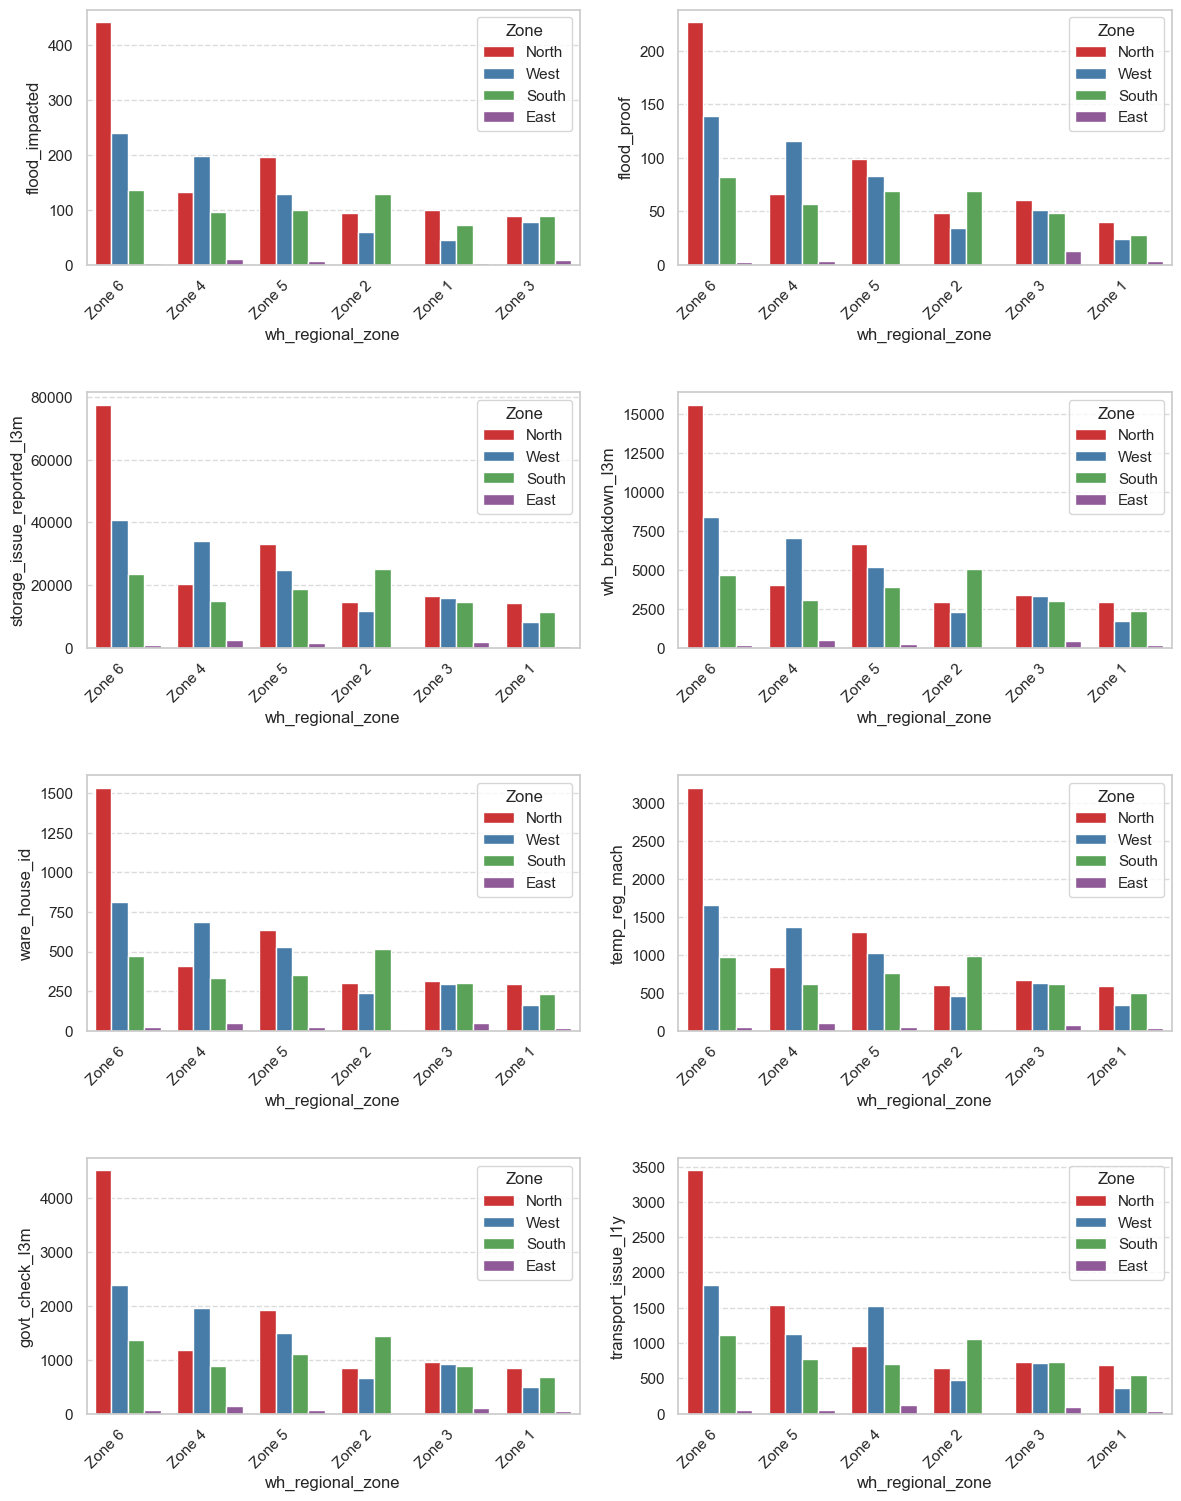

In [46]:
# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 18))

# Define the plotting region (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(14, 18))

# Custom colors
colors = sns.color_palette("Set1")

# Titles for each subplot
titles = [
    "Flood Impacted",
    "Flood Proof",
    "Storage Issues Reported (Last 3 Months)",
    "Warehouse Breakdown (Last 3 Months)",
    "Electricity Problems",
    "Temperature Regulation Machine Issues",
    "Government Checks (Last 3 Months)",
    "Transportation Issues (Last Year)"
]

# Create boxplot in each subplot
sns.barplot(data=floodImp_df, x='wh_regional_zone', y='flood_impacted', ax=axes[0,0], hue="zone", palette=colors)
sns.barplot(data=floodProof_df, x='wh_regional_zone', y="flood_proof", ax=axes[0,1], hue="zone", palette=colors)
sns.barplot(data=storage_df, x='wh_regional_zone', y="storage_issue_reported_l3m", ax=axes[1,0], hue="zone", palette=colors)
sns.barplot(data=breakdown_df, x='wh_regional_zone', y="wh_breakdown_l3m", ax=axes[1,1], hue="zone", palette=colors)
sns.barplot(data=elec_prob_df, x='wh_regional_zone', y="ware_house_id", ax=axes[2,0], hue="zone", palette=colors)
sns.barplot(data=temp_prob_df, x='wh_regional_zone', y="temp_reg_mach", ax=axes[2,1], hue="zone", palette=colors)
sns.barplot(data=govt_check_df, x='wh_regional_zone', y="govt_check_l3m", ax=axes[3,0], hue="zone", palette=colors)
sns.barplot(data=transport_issue_df, x='wh_regional_zone', y="transport_issue_l1y", ax=axes[3,1], hue="zone", palette=colors)

# Rotate x-axis labels
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add legend and adjust layout
for ax in axes.flat:
    ax.legend(title="Zone")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.5, bottom=0.1)

# Show the plots
plt.show()


Businesses face challenges like floods, storage issues, and equipment breakdowns, which can disrupt operations. To address these, companies should plan ahead by investing in flood prevention, maintaining equipment, and improving communication with customers. Regular checks by government officers may be due to customer complaints, so it's crucial to address concerns for customer satisfaction. Additional strategies include ensuring product quality, gathering customer feedback, collaborating with suppliers, using technology for monitoring, and diversifying the supply chain. These steps help businesses navigate challenges, satisfy customers, and maintain a strong supply chain.


In [47]:
df["dist_from_hub"].describe()

count    25000.000000
mean       163.537320
std         62.718609
min         55.000000
25%        109.000000
50%        164.000000
75%        218.000000
max        271.000000
Name: dist_from_hub, dtype: float64

In [48]:
def distance(x):
    if x<=90:
        return "short"
    elif x<=180:
        return "medium"
    else:
        return "long"

dis_df = df.copy()
    
dis_df["Distance Category"]=dis_df.dist_from_hub.apply(distance)

In [49]:
dis_df.columns = dis_df.columns.str.lower()

In [50]:
dis_refil_df=dis_df.groupby(["distance category","wh_regional_zone","wh_capacity_size", "zone"], as_index=False)["num_refill_req_l3m"].sum()

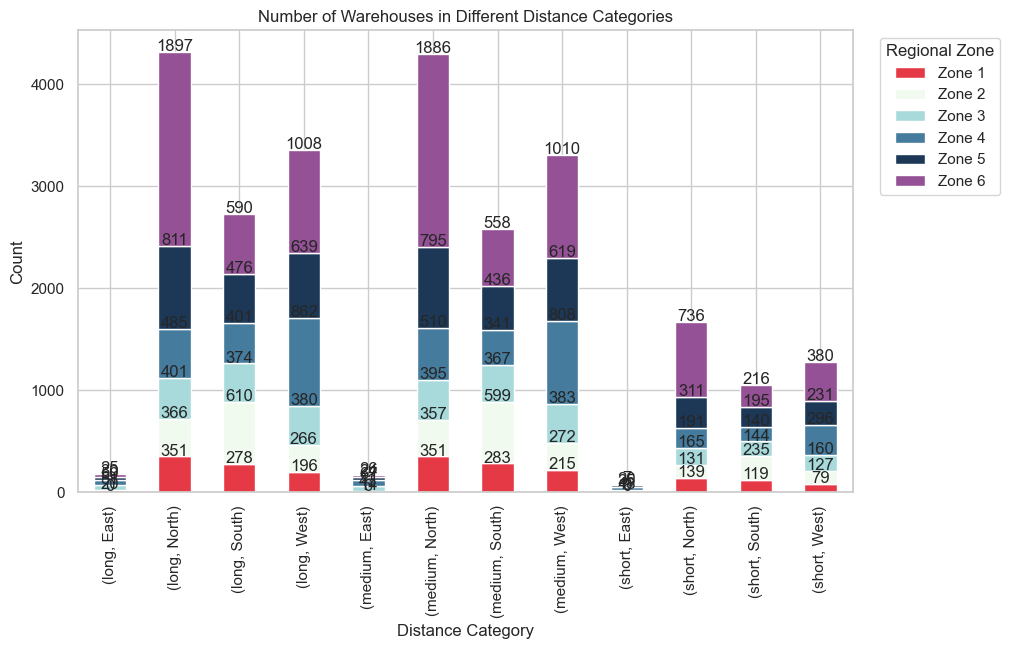

In [51]:
import matplotlib.pyplot as plt

# Define a custom color palette
colors =  ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3857', '#955196']

# Create the grouped data and plot with the custom color palette
grouped_data = dis_df.groupby(["distance category", "wh_regional_zone", "zone"])["ware_house_id"].count().unstack("wh_regional_zone")
ax = grouped_data.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Add a legend
plt.legend(title='Regional Zone', loc='upper right', bbox_to_anchor=(1.2, 1))

# Add axis labels and a title
plt.xlabel("Distance Category")
plt.ylabel('Count')
plt.title('Number of Warehouses in Different Distance Categories')

# Annotate the bars with the counts
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 10), ha='center')

# Show the plot
plt.show()


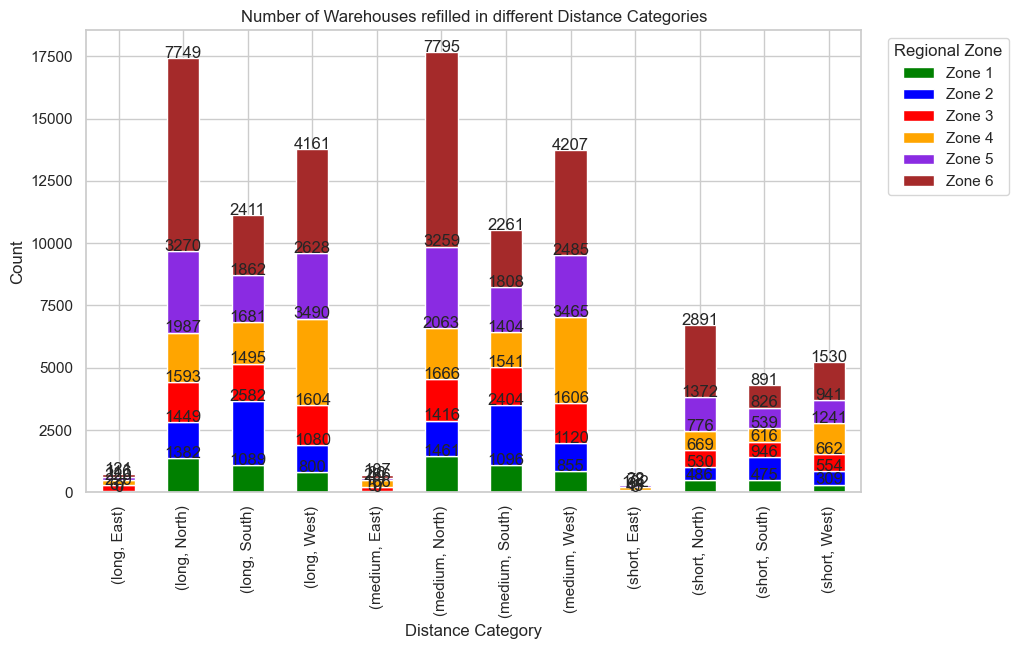

In [52]:
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ['#008000', '#0000FF', '#FF0000', '#FFA500', '#8A2BE2', '#A52A2A']
sns.set_palette(colors)

# Create the grouped data and plot with the custom color palette
grouped_data = dis_refil_df.groupby(["distance category", "wh_regional_zone", "zone"])["num_refill_req_l3m"].sum().unstack("wh_regional_zone")
ax = grouped_data.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Add a legend
plt.legend(title='Regional Zone', loc='upper right', bbox_to_anchor=(1.2, 1))

# Add axis labels and a title
plt.xlabel("Distance Category")
plt.ylabel('Count')
plt.title('Number of Warehouses refilled in different Distance Categories')

# Annotate the bars with the counts
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 10), ha='center')

# Show the plot
plt.show()


Shipping costs increase with distance, impacting a product's overall profitability. Longer distances lead to extended delivery times, potentially affecting supply and customer satisfaction. Managing complex supply chains for distant locations involves higher operational costs.

The frequency of refills and distance to supply a warehouse depend on factors like warehouse size and delivery frequency. Perishable goods may require more frequent deliveries for freshness. In cases like Zone 6 North, with high demand and warehouse size, optimizing transportation costs and inventory is crucial. This involves collaborating with logistics providers for efficient schedules and implementing inventory tracking systems.

Customized supply chain strategies tailored to specific business needs are essential, considering varying factors like distance, demand, and warehouse characteristics. This approach helps minimize costs and enhance overall operational efficiency.

#### Data Distribution

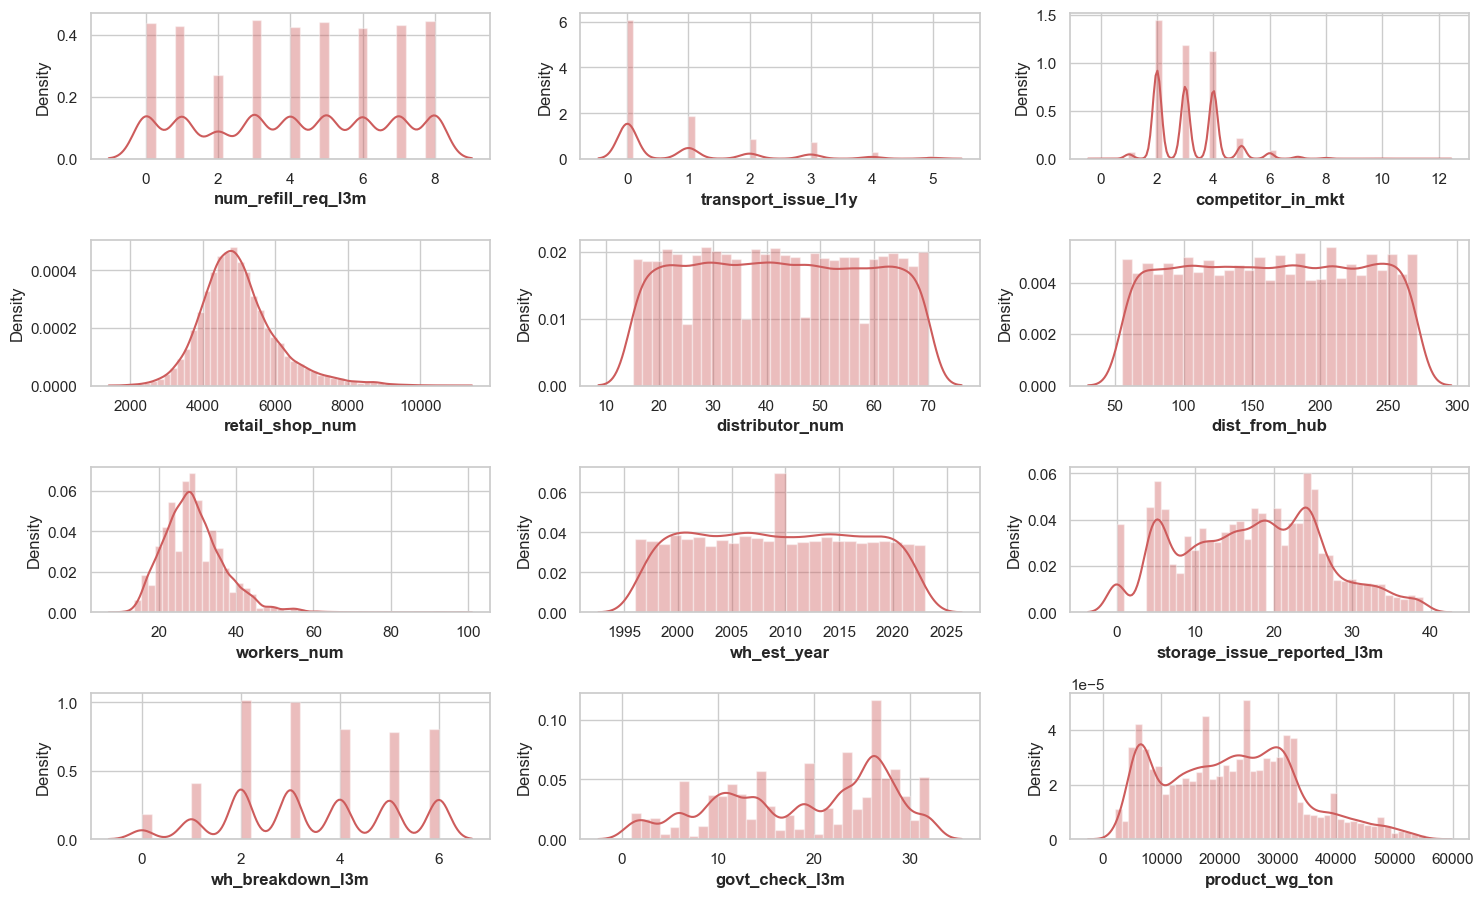

In [53]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_features):
    plt.subplot(9, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

### Feature Engineering

In [54]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.model_selection import GridSearchCV

In [55]:
df.drop(['wh_est_year'],axis=1,inplace=True)

In [56]:
fmcg_data = df.copy()

In [57]:
fmcg_data.columns

Index(['ware_house_id', 'wh_manager_id', 'location_type', 'wh_capacity_size',
       'zone', 'wh_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [58]:
# Identify columns with missing values
columns_with_missing_values = fmcg_data.columns[df.isnull().any()]

print("Columns with Missing Values:")
for column in columns_with_missing_values:
    missing_count = df[column].isnull().sum()
    print(f" {column}: {missing_count}")



Columns with Missing Values:
 workers_num: 990
 approved_wh_govt_certificate: 908


In [59]:
#splitting fmcg_data into X and y
X = fmcg_data.drop(columns=['ware_house_id','wh_manager_id','wh_owner_type',"product_wg_ton"], axis=1)
y = fmcg_data["product_wg_ton"]

In [60]:

X['approved_wh_govt_certificate'].fillna('unknown', inplace=True)


In [61]:
X.isna().sum()

location_type                     0
wh_capacity_size                  0
zone                              0
wh_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
competitor_in_mkt                 0
retail_shop_num                   0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     990
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate      0
wh_breakdown_l3m                  0
govt_check_l3m                    0
dtype: int64

In [62]:
X.shape

(25000, 19)

In [63]:
#splitting train and test data
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

In [64]:
from sklearn.impute import KNNImputer

# Select only the column with missing values
column_to_impute = ['workers_num']

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Impute missing values and update the DataFrame in-place
X_train[column_to_impute] = knn_imputer.fit_transform(X_train[column_to_impute])

X_test[column_to_impute] = knn_imputer.transform(X_test[column_to_impute])



In [65]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((20000, 19), (5000, 19), (20000,), (5000,))

In [66]:
X_train.isna().sum()

location_type                   0
wh_capacity_size                0
zone                            0
wh_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
competitor_in_mkt               0
retail_shop_num                 0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
dtype: int64

In [67]:
numeric_columns = [feature for feature in X.columns if X[feature].dtype != 'O']
ordinal_columns = ['wh_capacity_size', 'approved_wh_govt_certificate']
ohe_categorical_columns = ['location_type', 'zone', 'wh_regional_zone', 'flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach']
ordinal_categories = [['Small', 'Mid','Large'], ["C", "B", "B+", "A","A+"]]

In [68]:
X

location_type wh_capacity_size   zone wh_regional_zone  \
0             Urban            Small   West           Zone 6   
1             Rural            Large  North           Zone 5   
2             Rural              Mid  South           Zone 2   
3             Rural              Mid  North           Zone 3   
4             Rural            Large  North           Zone 5   
...             ...              ...    ...              ...   
24995         Rural            Small  North           Zone 1   
24996         Rural              Mid   West           Zone 2   
24997         Urban            Large  South           Zone 5   
24998         Rural            Small  North           Zone 1   
24999         Rural              Mid   West           Zone 4   

       num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
0                       3                    1                  2   
1                       0                    0                  4   
2                       1                    0                  4   
3                       7                    4                  2   
4                       3                    1                  2   
...                   ...                  ...                ...   
24995                   3                    0                  4   
24996                   6                    0                  4   
24997                   7                    0                  2   
24998                   1                    0                  2   
24999                   8                    2                  4   

       retail_shop_num  distributor_num flood_impacted flood_proof  \
0                 4651               24              0           1   
1                 6217               47              0           0   
2                 4306               64              0           0   
3                 6000               50              0           0   
4                 4740               42              1           0   
...                ...              ...            ...         ...   
24995             5390               19              0           0   
24996             4490               57              0           0   
24997             5403               31              1           0   
24998            10562               25              0           0   
24999             5664               21              0           1   

      electric_supply  dist_from_hub  workers_num  storage_issue_reported_l3m  \
0                   1             91         29.0                          13   
1                   1            210         31.0                           4   
2                   0            161         37.0                          17   
3                   0            103         21.0                          17   
4                   1            112         25.0                          18   
...               ...            ...          ...                         ...   
24995               1            142         34.0                          22   
24996               1            130         28.0                          10   
24997               1            147          NaN                          23   
24998               1             60         25.0                          18   
24999               1            239         39.0                           4   

      temp_reg_mach approved_wh_govt_certificate  wh_breakdown_l3m  \
0                 0                            A                 5   
1                 0                            A                 3   
2                 0                            A                 6   
3                 1                           A+                 3   
4                 0                            C                 6   
...             ...                          ...               ...   
24995             1                            A                 2   
24996             0               

In [69]:
# Assuming ordinal_columns and ordinal_categories are defined
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1)

In [70]:
# Apply ordinal encoding to the ordinal columns in X_train
X_train_or_encoded = ordinal_encoder.fit_transform(X_train[ordinal_columns])

In [71]:
X_train_or_encoded

array([[2., 2.],
       [1., 3.],
       [2., 4.],
       ...,
       [1., 0.],
       [1., 1.],
       [2., 2.]])

In [72]:
X_train_transformed=X_train.copy()

In [73]:
X_train_transformed

location_type wh_capacity_size   zone wh_regional_zone  \
23311         Rural            Large   West           Zone 6   
23623         Rural              Mid  North           Zone 3   
1020          Rural            Large  North           Zone 6   
12645         Rural            Large  South           Zone 5   
1533          Rural            Large  North           Zone 6   
...             ...              ...    ...              ...   
21575         Rural              Mid   West           Zone 3   
5390          Rural            Large  North           Zone 5   
860           Urban              Mid  North           Zone 4   
15795         Rural              Mid  North           Zone 3   
23654         Rural            Large  North           Zone 6   

       num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
23311                   1                    1                  4   
23623                   8                    0                  3   
1020                    8                    0                  4   
12645                   8                    1                  2   
1533                    4                    0                  4   
...                   ...                  ...                ...   
21575                   6                    0                  4   
5390                    0                    1                  4   
860                     7                    1                  3   
15795                   1                    0                  2   
23654                   2                    0                  3   

       retail_shop_num  distributor_num flood_impacted flood_proof  \
23311             4081               59              0           0   
23623             6079               53              0           0   
1020              4098               47              0           0   
12645             4460               52              0           0   
1533              4820               52              0           0   
...                ...              ...            ...         ...   
21575             4362               49              0           0   
5390              6983               23              0           0   
860               4818               22              0           0   
15795             4909               62              0           0   
23654             7260               62              0           0   

      electric_supply  dist_from_hub  workers_num  storage_issue_reported_l3m  \
23311               1            238         22.0                          28   
23623               1            223         30.0                          37   
1020                1            162         26.0                          24   
12645               1            124         40.0                          26   
1533                0            152         18.0                          19   
...               ...            ...          ...                         ...   
21575               1             56         25.0                          19   
5390                1            228         26.0                          16   
860                 0            187         24.0                          20   
15795               1            227         26.0                          19   
23654               1            185         42.0                          19   

      temp_reg_mach approved_wh_govt_certificate  wh_breakdown_l3m  \
23311             0                           B+                 5   
23623             0                            A                 4   
1020              1                           A+                 3   
12645             0                            B                 3   
1533              0                            B                 5   
...             ...                          ...               ...   
21575             0                            A                 1   
5390              0               

In [74]:
X_train_transformed1 = X_train_transformed.copy().reset_index(drop=True)

In [75]:
X_train_transformed1

location_type wh_capacity_size   zone wh_regional_zone  \
0             Rural            Large   West           Zone 6   
1             Rural              Mid  North           Zone 3   
2             Rural            Large  North           Zone 6   
3             Rural            Large  South           Zone 5   
4             Rural            Large  North           Zone 6   
...             ...              ...    ...              ...   
19995         Rural              Mid   West           Zone 3   
19996         Rural            Large  North           Zone 5   
19997         Urban              Mid  North           Zone 4   
19998         Rural              Mid  North           Zone 3   
19999         Rural            Large  North           Zone 6   

       num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
0                       1                    1                  4   
1                       8                    0                  3   
2                       8                    0                  4   
3                       8                    1                  2   
4                       4                    0                  4   
...                   ...                  ...                ...   
19995                   6                    0                  4   
19996                   0                    1                  4   
19997                   7                    1                  3   
19998                   1                    0                  2   
19999                   2                    0                  3   

       retail_shop_num  distributor_num flood_impacted flood_proof  \
0                 4081               59              0           0   
1                 6079               53              0           0   
2                 4098               47              0           0   
3                 4460               52              0           0   
4                 4820               52              0           0   
...                ...              ...            ...         ...   
19995             4362               49              0           0   
19996             6983               23              0           0   
19997             4818               22              0           0   
19998             4909               62              0           0   
19999             7260               62              0           0   

      electric_supply  dist_from_hub  workers_num  storage_issue_reported_l3m  \
0                   1            238         22.0                          28   
1                   1            223         30.0                          37   
2                   1            162         26.0                          24   
3                   1            124         40.0                          26   
4                   0            152         18.0                          19   
...               ...            ...          ...                         ...   
19995               1             56         25.0                          19   
19996               1            228         26.0                          16   
19997               0            187         24.0                          20   
19998               1            227         26.0                          19   
19999               1            185         42.0                          19   

      temp_reg_mach approved_wh_govt_certificate  wh_breakdown_l3m  \
0                 0                           B+                 5   
1                 0                            A                 4   
2                 1                           A+                 3   
3                 0                            B                 3   
4                 0                            B                 5   
...             ...                          ...               ...   
19995             0                            A                 1   
19996             0               

In [76]:
X_train_transformed1[ordinal_columns]=X_train_or_encoded

In [77]:
X_train_transformed1

location_type  wh_capacity_size   zone wh_regional_zone  \
0             Rural               2.0   West           Zone 6   
1             Rural               1.0  North           Zone 3   
2             Rural               2.0  North           Zone 6   
3             Rural               2.0  South           Zone 5   
4             Rural               2.0  North           Zone 6   
...             ...               ...    ...              ...   
19995         Rural               1.0   West           Zone 3   
19996         Rural               2.0  North           Zone 5   
19997         Urban               1.0  North           Zone 4   
19998         Rural               1.0  North           Zone 3   
19999         Rural               2.0  North           Zone 6   

       num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
0                       1                    1                  4   
1                       8                    0                  3   
2                       8                    0                  4   
3                       8                    1                  2   
4                       4                    0                  4   
...                   ...                  ...                ...   
19995                   6                    0                  4   
19996                   0                    1                  4   
19997                   7                    1                  3   
19998                   1                    0                  2   
19999                   2                    0                  3   

       retail_shop_num  distributor_num flood_impacted flood_proof  \
0                 4081               59              0           0   
1                 6079               53              0           0   
2                 4098               47              0           0   
3                 4460               52              0           0   
4                 4820               52              0           0   
...                ...              ...            ...         ...   
19995             4362               49              0           0   
19996             6983               23              0           0   
19997             4818               22              0           0   
19998             4909               62              0           0   
19999             7260               62              0           0   

      electric_supply  dist_from_hub  workers_num  storage_issue_reported_l3m  \
0                   1            238         22.0                          28   
1                   1            223         30.0                          37   
2                   1            162         26.0                          24   
3                   1            124         40.0                          26   
4                   0            152         18.0                          19   
...               ...            ...          ...                         ...   
19995               1             56         25.0                          19   
19996               1            228         26.0                          16   
19997               0            187         24.0                          20   
19998               1            227         26.0                          19   
19999               1            185         42.0                          19   

      temp_reg_mach  approved_wh_govt_certificate  wh_breakdown_l3m  \
0                 0                           2.0                 5   
1                 0                           3.0                 4   
2                 1                           4.0                 3   
3                 0                           1.0                 3   
4                 0                           1.0                 5   
...             ...                           ...               ...   
19995             0                           3.0                 1   
19996         

In [78]:
# Apply StandardScaler to the numerical columns
scaler = StandardScaler()

# Transform the numerical columns in X_train
X_train_scaled = scaler.fit_transform(X_train_transformed1[numeric_columns])

In [79]:
pd.DataFrame(X_train_scaled)

0         1         2         3         4         5         6  \
0     -1.188838  0.188592  0.795464 -0.861353  1.033787  1.193945 -0.907206   
1      1.496848 -0.646624 -0.086425  1.036329  0.659390  0.954705  0.132612   
2      1.496848 -0.646624  0.795464 -0.845206  0.284994 -0.018206 -0.387297   
3      1.496848  0.188592 -0.968314 -0.501382  0.596991 -0.624282  1.432384   
4     -0.037830 -0.646624  0.795464 -0.159458  0.596991 -0.177700 -1.427115   
...         ...       ...       ...       ...       ...       ...       ...   
19995  0.729509 -0.646624  0.795464 -0.594462  0.409793 -1.708838 -0.517274   
19996 -1.572507  0.188592  0.795464  1.894939 -1.212592  1.034452 -0.387297   
19997  1.113178  0.188592 -0.086425 -0.161357 -1.274992  0.380528 -0.647252   
19998 -1.188838 -0.646624 -0.968314 -0.074926  1.220985  1.018502 -0.387297   
19999 -0.805169 -0.646624 -0.086425  2.158031  1.220985  0.348629  1.692338   

              7         8         9  
0      1.184447  0.899010 -1.490176  
1      2.165712  0.306289  0.946117  
2      0.748329 -0.286433  0.482061  
3      0.966388 -0.286433  0.714089  
4      0.203182  0.899010 -1.490176  
...         ...       ...       ...  
19995  0.203182 -1.471875  0.018005  
19996 -0.123907 -0.286433 -0.562064  
19997  0.312211 -0.879154  0.830103  
19998  0.203182 -0.879154  0.946117  
19999  0.203182  0.899010  0.482061  

[20000 rows x 10 columns]

In [80]:
X_train_transformed1[numeric_columns]=X_train_scaled

In [81]:
X_train_transformed1

location_type  wh_capacity_size   zone wh_regional_zone  \
0             Rural               2.0   West           Zone 6   
1             Rural               1.0  North           Zone 3   
2             Rural               2.0  North           Zone 6   
3             Rural               2.0  South           Zone 5   
4             Rural               2.0  North           Zone 6   
...             ...               ...    ...              ...   
19995         Rural               1.0   West           Zone 3   
19996         Rural               2.0  North           Zone 5   
19997         Urban               1.0  North           Zone 4   
19998         Rural               1.0  North           Zone 3   
19999         Rural               2.0  North           Zone 6   

       num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
0               -1.188838             0.188592           0.795464   
1                1.496848            -0.646624          -0.086425   
2                1.496848            -0.646624           0.795464   
3                1.496848             0.188592          -0.968314   
4               -0.037830            -0.646624           0.795464   
...                   ...                  ...                ...   
19995            0.729509            -0.646624           0.795464   
19996           -1.572507             0.188592           0.795464   
19997            1.113178             0.188592          -0.086425   
19998           -1.188838            -0.646624          -0.968314   
19999           -0.805169            -0.646624          -0.086425   

       retail_shop_num  distributor_num flood_impacted flood_proof  \
0            -0.861353         1.033787              0           0   
1             1.036329         0.659390              0           0   
2            -0.845206         0.284994              0           0   
3            -0.501382         0.596991              0           0   
4            -0.159458         0.596991              0           0   
...                ...              ...            ...         ...   
19995        -0.594462         0.409793              0           0   
19996         1.894939        -1.212592              0           0   
19997        -0.161357        -1.274992              0           0   
19998        -0.074926         1.220985              0           0   
19999         2.158031         1.220985              0           0   

      electric_supply  dist_from_hub  workers_num  storage_issue_reported_l3m  \
0                   1       1.193945    -0.907206                    1.184447   
1                   1       0.954705     0.132612                    2.165712   
2                   1      -0.018206    -0.387297                    0.748329   
3                   1      -0.624282     1.432384                    0.966388   
4                   0      -0.177700    -1.427115                    0.203182   
...               ...            ...          ...                         ...   
19995               1      -1.708838    -0.517274                    0.203182   
19996               1       1.034452    -0.387297                   -0.123907   
19997               0       0.380528    -0.647252                    0.312211   
19998               1       1.018502    -0.387297                    0.203182   
19999               1       0.348629     1.692338                    0.203182   

      temp_reg_mach  approved_wh_govt_certificate  wh_breakdown_l3m  \
0                 0                           2.0          0.899010   
1                 0                           3.0          0.306289   
2                 1                           4.0         -0.286433   
3                 0                           1.0         -0.286433   
4                 0                           1.0          0.899010   
...             ...                           ...               ...   
19995             0                           3.0         -1.471875   
19996         

In [82]:
# Apply OneHotEncoder to the remaining categorical columns
onehot_encoder = OneHotEncoder(sparse=False, drop="first", handle_unknown='ignore')

In [83]:
# Transform the remaining categorical columns in X_train
X_train_encoded = onehot_encoder.fit_transform(X_train_transformed1[ohe_categorical_columns])

In [84]:
X_train_encoded.shape

(20000, 13)

In [85]:
ohe_feature_names = onehot_encoder.get_feature_names_out(input_features=ohe_categorical_columns)

In [86]:
ohe_feature_names

array(['location_type_Urban', 'zone_North', 'zone_South', 'zone_West',
       'wh_regional_zone_Zone 2', 'wh_regional_zone_Zone 3',
       'wh_regional_zone_Zone 4', 'wh_regional_zone_Zone 5',
       'wh_regional_zone_Zone 6', 'flood_impacted_1', 'flood_proof_1',
       'electric_supply_1', 'temp_reg_mach_1'], dtype=object)

In [87]:
X_train_encoded = pd.DataFrame(X_train_encoded,columns=ohe_feature_names)

In [88]:
X_train_transformed1[ohe_feature_names]=X_train_encoded

In [89]:
X_train_transformed1

location_type  wh_capacity_size   zone wh_regional_zone  \
0             Rural               2.0   West           Zone 6   
1             Rural               1.0  North           Zone 3   
2             Rural               2.0  North           Zone 6   
3             Rural               2.0  South           Zone 5   
4             Rural               2.0  North           Zone 6   
...             ...               ...    ...              ...   
19995         Rural               1.0   West           Zone 3   
19996         Rural               2.0  North           Zone 5   
19997         Urban               1.0  North           Zone 4   
19998         Rural               1.0  North           Zone 3   
19999         Rural               2.0  North           Zone 6   

       num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
0               -1.188838             0.188592           0.795464   
1                1.496848            -0.646624          -0.086425   
2                1.496848            -0.646624           0.795464   
3                1.496848             0.188592          -0.968314   
4               -0.037830            -0.646624           0.795464   
...                   ...                  ...                ...   
19995            0.729509            -0.646624           0.795464   
19996           -1.572507             0.188592           0.795464   
19997            1.113178             0.188592          -0.086425   
19998           -1.188838            -0.646624          -0.968314   
19999           -0.805169            -0.646624          -0.086425   

       retail_shop_num  distributor_num flood_impacted  ... zone_West  \
0            -0.861353         1.033787              0  ...       1.0   
1             1.036329         0.659390              0  ...       0.0   
2            -0.845206         0.284994              0  ...       0.0   
3            -0.501382         0.596991              0  ...       0.0   
4            -0.159458         0.596991              0  ...       0.0   
...                ...              ...            ...  ...       ...   
19995        -0.594462         0.409793              0  ...       1.0   
19996         1.894939        -1.212592              0  ...       0.0   
19997        -0.161357        -1.274992              0  ...       0.0   
19998        -0.074926         1.220985              0  ...       0.0   
19999         2.158031         1.220985              0  ...       0.0   

      wh_regional_zone_Zone 2  wh_regional_zone_Zone 3  \
0                         0.0                      0.0   
1                         0.0                      1.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   
...                       ...                      ...   
19995                     0.0                      1.0   
19996                     0.0                      0.0   
19997                     0.0                      0.0   
19998                     0.0                      1.0   
19999                     0.0                      0.0   

       wh_regional_zone_Zone 4  wh_regional_zone_Zone 5  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      1.0   
4                          0.0                      0.0   
...                        ...                      ...   
19995                      0.0                      0.0   
19996                      0.0                      1.0   
19997                      1.0                      0.0   
19998                      0.0                      0.0   
19999                      0.0                      0.0   

      wh_regional_zone_Zone 6  flood_impacted_1  flood_proof_1  \
0                         1.0               0.0

In [90]:
X_train_transformed1.drop(columns=ohe_categorical_columns, inplace=True)

In [91]:
X_train_transformed1

wh_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                   2.0           -1.188838             0.188592   
1                   1.0            1.496848            -0.646624   
2                   2.0            1.496848            -0.646624   
3                   2.0            1.496848             0.188592   
4                   2.0           -0.037830            -0.646624   
...                 ...                 ...                  ...   
19995               1.0            0.729509            -0.646624   
19996               2.0           -1.572507             0.188592   
19997               1.0            1.113178             0.188592   
19998               1.0           -1.188838            -0.646624   
19999               2.0           -0.805169            -0.646624   

       competitor_in_mkt  retail_shop_num  distributor_num  dist_from_hub  \
0               0.795464        -0.861353         1.033787       1.193945   
1              -0.086425         1.036329         0.659390       0.954705   
2               0.795464        -0.845206         0.284994      -0.018206   
3              -0.968314        -0.501382         0.596991      -0.624282   
4               0.795464        -0.159458         0.596991      -0.177700   
...                  ...              ...              ...            ...   
19995           0.795464        -0.594462         0.409793      -1.708838   
19996           0.795464         1.894939        -1.212592       1.034452   
19997          -0.086425        -0.161357        -1.274992       0.380528   
19998          -0.968314        -0.074926         1.220985       1.018502   
19999          -0.086425         2.158031         1.220985       0.348629   

       workers_num  storage_issue_reported_l3m  approved_wh_govt_certificate  \
0        -0.907206                    1.184447                           2.0   
1         0.132612                    2.165712                           3.0   
2        -0.387297                    0.748329                           4.0   
3         1.432384                    0.966388                           1.0   
4        -1.427115                    0.203182                           1.0   
...            ...                         ...                           ...   
19995    -0.517274                    0.203182                           3.0   
19996    -0.387297                   -0.123907                           4.0   
19997    -0.647252                    0.312211                           0.0   
19998    -0.387297                    0.203182                           1.0   
19999     1.692338                    0.203182                           2.0   

       ...  zone_West  wh_regional_zone_Zone 2  wh_regional_zone_Zone 3  \
0      ...        1.0                      0.0                      0.0   
1      ...        0.0                      0.0                      1.0   
2      ...        0.0                      0.0                      0.0   
3      ...        0.0                      0.0                      0.0   
4      ...        0.0                      0.0                      0.0   
...    ...        ...                      ...                      ...   
19995  ...        1.0                      0.0                      1.0   
19996  ...        0.0                      0.0                      0.0   
19997  ...        0.0                      0.0                      0.0   
19998  ...        0.0                      0.0                      1.0   
19999  ...        0.0                      0.0                      0.0   

       wh_regional_zone_Zone 4  wh_regional_zone_Zone 5  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      1.0   
4                          0.0                      0.0   
...                        ...                   

In [92]:
X_train_transformed=X_train_transformed1

In [93]:
X_train_transformed

wh_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                   2.0           -1.188838             0.188592   
1                   1.0            1.496848            -0.646624   
2                   2.0            1.496848            -0.646624   
3                   2.0            1.496848             0.188592   
4                   2.0           -0.037830            -0.646624   
...                 ...                 ...                  ...   
19995               1.0            0.729509            -0.646624   
19996               2.0           -1.572507             0.188592   
19997               1.0            1.113178             0.188592   
19998               1.0           -1.188838            -0.646624   
19999               2.0           -0.805169            -0.646624   

       competitor_in_mkt  retail_shop_num  distributor_num  dist_from_hub  \
0               0.795464        -0.861353         1.033787       1.193945   
1              -0.086425         1.036329         0.659390       0.954705   
2               0.795464        -0.845206         0.284994      -0.018206   
3              -0.968314        -0.501382         0.596991      -0.624282   
4               0.795464        -0.159458         0.596991      -0.177700   
...                  ...              ...              ...            ...   
19995           0.795464        -0.594462         0.409793      -1.708838   
19996           0.795464         1.894939        -1.212592       1.034452   
19997          -0.086425        -0.161357        -1.274992       0.380528   
19998          -0.968314        -0.074926         1.220985       1.018502   
19999          -0.086425         2.158031         1.220985       0.348629   

       workers_num  storage_issue_reported_l3m  approved_wh_govt_certificate  \
0        -0.907206                    1.184447                           2.0   
1         0.132612                    2.165712                           3.0   
2        -0.387297                    0.748329                           4.0   
3         1.432384                    0.966388                           1.0   
4        -1.427115                    0.203182                           1.0   
...            ...                         ...                           ...   
19995    -0.517274                    0.203182                           3.0   
19996    -0.387297                   -0.123907                           4.0   
19997    -0.647252                    0.312211                           0.0   
19998    -0.387297                    0.203182                           1.0   
19999     1.692338                    0.203182                           2.0   

       ...  zone_West  wh_regional_zone_Zone 2  wh_regional_zone_Zone 3  \
0      ...        1.0                      0.0                      0.0   
1      ...        0.0                      0.0                      1.0   
2      ...        0.0                      0.0                      0.0   
3      ...        0.0                      0.0                      0.0   
4      ...        0.0                      0.0                      0.0   
...    ...        ...                      ...                      ...   
19995  ...        1.0                      0.0                      1.0   
19996  ...        0.0                      0.0                      0.0   
19997  ...        0.0                      0.0                      0.0   
19998  ...        0.0                      0.0                      1.0   
19999  ...        0.0                      0.0                      0.0   

       wh_regional_zone_Zone 4  wh_regional_zone_Zone 5  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      1.0   
4                          0.0                      0.0   
...                        ...                   

In [94]:
X_test

location_type wh_capacity_size   zone wh_regional_zone  \
6868          Rural            Large  North           Zone 6   
24016         Rural            Large  North           Zone 6   
9668          Rural            Small   East           Zone 6   
13640         Rural              Mid   West           Zone 4   
14018         Rural              Mid  South           Zone 3   
...             ...              ...    ...              ...   
8670          Rural              Mid  North           Zone 2   
11839         Rural            Small  North           Zone 6   
4013          Rural            Large   West           Zone 6   
21147         Rural            Large   West           Zone 5   
695           Rural            Small  North           Zone 1   

       num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
6868                    3                    3                  3   
24016                   6                    0                  3   
9668                    3                    2                  7   
13640                   1                    0                  4   
14018                   1                    0                  2   
...                   ...                  ...                ...   
8670                    2                    4                  2   
11839                   5                    0                  3   
4013                    7                    3                  6   
21147                   7                    2                  4   
695                     1                    0                  2   

       retail_shop_num  distributor_num flood_impacted flood_proof  \
6868              4945               48              0           0   
24016             4779               66              0           0   
9668              4352               34              0           0   
13640             6269               28              0           0   
14018             6644               66              0           0   
...                ...              ...            ...         ...   
8670              5163               67              1           0   
11839             4230               55              1           0   
4013              3699               48              0           0   
21147             3799               48              0           0   
695               4654               29              0           0   

      electric_supply  dist_from_hub  workers_num  storage_issue_reported_l3m  \
6868                1             90         23.0                           5   
24016               1            262         23.0                          13   
9668                0             88         19.0                           9   
13640               0            223         16.0                          25   
14018               1            129         26.0                          15   
...               ...            ...          ...                         ...   
8670                1            100         36.0                          10   
11839               0             61         25.0                          29   
4013                1             67         22.0                          25   
21147               1            208         22.0                           5   
695                 1             82         24.0                          20   

      temp_reg_mach approved_wh_govt_certificate  wh_breakdown_l3m  \
6868              0                            A                 3   
24016             0                            C                 4   
9668              1                            B                 4   
13640             0                           B+                 5   
14018             1                            B                 4   
...             ...                          ...               ...   
8670              0                            C                 3   
11839             0               

In [95]:
X_test=X_test.reset_index()

In [96]:
X_test

index location_type wh_capacity_size   zone wh_regional_zone  \
0      6868         Rural            Large  North           Zone 6   
1     24016         Rural            Large  North           Zone 6   
2      9668         Rural            Small   East           Zone 6   
3     13640         Rural              Mid   West           Zone 4   
4     14018         Rural              Mid  South           Zone 3   
...     ...           ...              ...    ...              ...   
4995   8670         Rural              Mid  North           Zone 2   
4996  11839         Rural            Small  North           Zone 6   
4997   4013         Rural            Large   West           Zone 6   
4998  21147         Rural            Large   West           Zone 5   
4999    695         Rural            Small  North           Zone 1   

      num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
0                      3                    3                  3   
1                      6                    0                  3   
2                      3                    2                  7   
3                      1                    0                  4   
4                      1                    0                  2   
...                  ...                  ...                ...   
4995                   2                    4                  2   
4996                   5                    0                  3   
4997                   7                    3                  6   
4998                   7                    2                  4   
4999                   1                    0                  2   

      retail_shop_num  distributor_num flood_impacted flood_proof  \
0                4945               48              0           0   
1                4779               66              0           0   
2                4352               34              0           0   
3                6269               28              0           0   
4                6644               66              0           0   
...               ...              ...            ...         ...   
4995             5163               67              1           0   
4996             4230               55              1           0   
4997             3699               48              0           0   
4998             3799               48              0           0   
4999             4654               29              0           0   

     electric_supply  dist_from_hub  workers_num  storage_issue_reported_l3m  \
0                  1             90         23.0                           5   
1                  1            262         23.0                          13   
2                  0             88         19.0                           9   
3                  0            223         16.0                          25   
4                  1            129         26.0                          15   
...              ...            ...          ...                         ...   
4995               1            100         36.0                          10   
4996               0             61         25.0                          29   
4997               1             67         22.0                          25   
4998               1            208         22.0                           5   
4999               1             82         24.0                          20   

     temp_reg_mach approved_wh_govt_certificate  wh_breakdown_l3m  \
0                0                            A                 3   
1                0                            C                 4   
2                1                            B                 4   
3                0                           B+                 5   
4                1                            B                 4   
...            ...                          ...               ...   
4995             0                            C                 3   
4996  

In [97]:
X_test.drop(columns=['index'],inplace=True)

In [98]:
X_test

location_type wh_capacity_size   zone wh_regional_zone  \
0            Rural            Large  North           Zone 6   
1            Rural            Large  North           Zone 6   
2            Rural            Small   East           Zone 6   
3            Rural              Mid   West           Zone 4   
4            Rural              Mid  South           Zone 3   
...            ...              ...    ...              ...   
4995         Rural              Mid  North           Zone 2   
4996         Rural            Small  North           Zone 6   
4997         Rural            Large   West           Zone 6   
4998         Rural            Large   West           Zone 5   
4999         Rural            Small  North           Zone 1   

      num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
0                      3                    3                  3   
1                      6                    0                  3   
2                      3                    2                  7   
3                      1                    0                  4   
4                      1                    0                  2   
...                  ...                  ...                ...   
4995                   2                    4                  2   
4996                   5                    0                  3   
4997                   7                    3                  6   
4998                   7                    2                  4   
4999                   1                    0                  2   

      retail_shop_num  distributor_num flood_impacted flood_proof  \
0                4945               48              0           0   
1                4779               66              0           0   
2                4352               34              0           0   
3                6269               28              0           0   
4                6644               66              0           0   
...               ...              ...            ...         ...   
4995             5163               67              1           0   
4996             4230               55              1           0   
4997             3699               48              0           0   
4998             3799               48              0           0   
4999             4654               29              0           0   

     electric_supply  dist_from_hub  workers_num  storage_issue_reported_l3m  \
0                  1             90         23.0                           5   
1                  1            262         23.0                          13   
2                  0             88         19.0                           9   
3                  0            223         16.0                          25   
4                  1            129         26.0                          15   
...              ...            ...          ...                         ...   
4995               1            100         36.0                          10   
4996               0             61         25.0                          29   
4997               1             67         22.0                          25   
4998               1            208         22.0                           5   
4999               1             82         24.0                          20   

     temp_reg_mach approved_wh_govt_certificate  wh_breakdown_l3m  \
0                0                            A                 3   
1                0                            C                 4   
2                1                            B                 4   
3                0                           B+                 5   
4                1                            B                 4   
...            ...                          ...               ...   
4995             0                            C                 3   
4996             0                            C                 4   
4997             1  

In [99]:
X_test_transformer=X_test.copy()

In [100]:
X_test_transformer

location_type wh_capacity_size   zone wh_regional_zone  \
0            Rural            Large  North           Zone 6   
1            Rural            Large  North           Zone 6   
2            Rural            Small   East           Zone 6   
3            Rural              Mid   West           Zone 4   
4            Rural              Mid  South           Zone 3   
...            ...              ...    ...              ...   
4995         Rural              Mid  North           Zone 2   
4996         Rural            Small  North           Zone 6   
4997         Rural            Large   West           Zone 6   
4998         Rural            Large   West           Zone 5   
4999         Rural            Small  North           Zone 1   

      num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
0                      3                    3                  3   
1                      6                    0                  3   
2                      3                    2                  7   
3                      1                    0                  4   
4                      1                    0                  2   
...                  ...                  ...                ...   
4995                   2                    4                  2   
4996                   5                    0                  3   
4997                   7                    3                  6   
4998                   7                    2                  4   
4999                   1                    0                  2   

      retail_shop_num  distributor_num flood_impacted flood_proof  \
0                4945               48              0           0   
1                4779               66              0           0   
2                4352               34              0           0   
3                6269               28              0           0   
4                6644               66              0           0   
...               ...              ...            ...         ...   
4995             5163               67              1           0   
4996             4230               55              1           0   
4997             3699               48              0           0   
4998             3799               48              0           0   
4999             4654               29              0           0   

     electric_supply  dist_from_hub  workers_num  storage_issue_reported_l3m  \
0                  1             90         23.0                           5   
1                  1            262         23.0                          13   
2                  0             88         19.0                           9   
3                  0            223         16.0                          25   
4                  1            129         26.0                          15   
...              ...            ...          ...                         ...   
4995               1            100         36.0                          10   
4996               0             61         25.0                          29   
4997               1             67         22.0                          25   
4998               1            208         22.0                           5   
4999               1             82         24.0                          20   

     temp_reg_mach approved_wh_govt_certificate  wh_breakdown_l3m  \
0                0                            A                 3   
1                0                            C                 4   
2                1                            B                 4   
3                0                           B+                 5   
4                1                            B                 4   
...            ...                          ...               ...   
4995             0                            C                 3   
4996             0                            C                 4   
4997             1  

In [101]:
# One-Hot Encoding for X_test
X_test_encoded = onehot_encoder.transform(X_test_transformer[ohe_categorical_columns])

In [102]:
X_test_encoded = pd.DataFrame(X_test_encoded,columns=ohe_feature_names)

In [103]:
ohe_feature_names

array(['location_type_Urban', 'zone_North', 'zone_South', 'zone_West',
       'wh_regional_zone_Zone 2', 'wh_regional_zone_Zone 3',
       'wh_regional_zone_Zone 4', 'wh_regional_zone_Zone 5',
       'wh_regional_zone_Zone 6', 'flood_impacted_1', 'flood_proof_1',
       'electric_supply_1', 'temp_reg_mach_1'], dtype=object)

In [104]:
X_test_encoded

location_type_Urban  zone_North  zone_South  zone_West  \
0                     0.0         1.0         0.0        0.0   
1                     0.0         1.0         0.0        0.0   
2                     0.0         0.0         0.0        0.0   
3                     0.0         0.0         0.0        1.0   
4                     0.0         0.0         1.0        0.0   
...                   ...         ...         ...        ...   
4995                  0.0         1.0         0.0        0.0   
4996                  0.0         1.0         0.0        0.0   
4997                  0.0         0.0         0.0        1.0   
4998                  0.0         0.0         0.0        1.0   
4999                  0.0         1.0         0.0        0.0   

      wh_regional_zone_Zone 2  wh_regional_zone_Zone 3  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      1.0   
...                       ...                      ...   
4995                      1.0                      0.0   
4996                      0.0                      0.0   
4997                      0.0                      0.0   
4998                      0.0                      0.0   
4999                      0.0                      0.0   

      wh_regional_zone_Zone 4  wh_regional_zone_Zone 5  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         1.0                      0.0   
4                         0.0                      0.0   
...                       ...                      ...   
4995                      0.0                      0.0   
4996                      0.0                      0.0   
4997                      0.0                      0.0   
4998                      0.0                      1.0   
4999                      0.0                      0.0   

      wh_regional_zone_Zone 6  flood_impacted_1  flood_proof_1  \
0                         1.0               0.0            0.0   
1                         1.0               0.0            0.0   
2                         1.0               0.0            0.0   
3                         0.0               0.0            0.0   
4                         0.0               0.0            0.0   
...                       ...               ...            ...   
4995                      0.0               1.0            0.0   
4996                      1.0               1.0            0.0   
4997                      1.0               0.0            0.0   
4998                      0.0               0.0            0.0   
4999                      0.0               0.0            0.0   

      electric_supply_1  temp_reg_mach_1  
0                   1.0              0.0  
1                   1.0              0.0  
2                   0.0              1.0  
3                   0.0              0.0  
4                   1.0              1.0  
...                 ...              ...  
4995                1.0              0.0  
4996                0.0              0.0  
4997                1.0              1.0  
4998                1.0              1.0  
4999                1.0              0.0  

[5000 rows x 13 columns]

In [105]:
X_test_transformer[numeric_columns]=scaler.transform(X_test_transformer[numeric_columns])


In [106]:
X_test_transformer

location_type wh_capacity_size   zone wh_regional_zone  \
0            Rural            Large  North           Zone 6   
1            Rural            Large  North           Zone 6   
2            Rural            Small   East           Zone 6   
3            Rural              Mid   West           Zone 4   
4            Rural              Mid  South           Zone 3   
...            ...              ...    ...              ...   
4995         Rural              Mid  North           Zone 2   
4996         Rural            Small  North           Zone 6   
4997         Rural            Large   West           Zone 6   
4998         Rural            Large   West           Zone 5   
4999         Rural            Small  North           Zone 1   

      num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
0              -0.421499             1.859025          -0.086425   
1               0.729509            -0.646624          -0.086425   
2              -0.421499             1.023808           3.441131   
3              -1.188838            -0.646624           0.795464   
4              -1.188838            -0.646624          -0.968314   
...                  ...                  ...                ...   
4995           -0.805169             2.694241          -0.968314   
4996            0.345840            -0.646624          -0.086425   
4997            1.113178             1.859025           2.559242   
4998            1.113178             1.023808           0.795464   
4999           -1.188838            -0.646624          -0.968314   

      retail_shop_num  distributor_num flood_impacted flood_proof  \
0           -0.040734         0.347393              0           0   
1           -0.198399         1.470583              0           0   
2           -0.603960        -0.526199              0           0   
3            1.216789        -0.900595              0           0   
4            1.572960         1.470583              0           0   
...               ...              ...            ...         ...   
4995         0.166320         1.532982              1           0   
4996        -0.719834         0.784189              1           0   
4997        -1.224173         0.347393              0           0   
4998        -1.129194         0.347393              0           0   
4999        -0.317123        -0.838196              0           0   

     electric_supply  dist_from_hub  workers_num  storage_issue_reported_l3m  \
0                  1      -1.166560    -0.777229                   -1.323231   
1                  1       1.576730    -0.777229                   -0.450995   
2                  0      -1.198459    -1.297138                   -0.887113   
3                  0       0.954705    -1.687069                    0.857359   
4                  1      -0.544535    -0.387297                   -0.232936   
...              ...            ...          ...                         ...   
4995               1      -1.007066     0.912475                   -0.778083   
4996               0      -1.629091    -0.517274                    1.293476   
4997               1      -1.533395    -0.907206                    0.857359   
4998               1       0.715464    -0.907206                   -1.323231   
4999               1      -1.294155    -0.647252                    0.312211   

     temp_reg_mach approved_wh_govt_certificate  wh_breakdown_l3m  \
0                0                            A         -0.286433   
1                0                            C          0.306289   
2                1                            B          0.306289   
3                0                           B+          0.899010   
4                1                            B          0.306289   
...            ...                          ...               ...   
4995             0                            C         -0.286433   
4996             0                            C          0.306289   
4997             1  

In [107]:
X_test_transformer[ohe_feature_names] = X_train_encoded

In [108]:
X_test_transformer

location_type wh_capacity_size   zone wh_regional_zone  \
0            Rural            Large  North           Zone 6   
1            Rural            Large  North           Zone 6   
2            Rural            Small   East           Zone 6   
3            Rural              Mid   West           Zone 4   
4            Rural              Mid  South           Zone 3   
...            ...              ...    ...              ...   
4995         Rural              Mid  North           Zone 2   
4996         Rural            Small  North           Zone 6   
4997         Rural            Large   West           Zone 6   
4998         Rural            Large   West           Zone 5   
4999         Rural            Small  North           Zone 1   

      num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
0              -0.421499             1.859025          -0.086425   
1               0.729509            -0.646624          -0.086425   
2              -0.421499             1.023808           3.441131   
3              -1.188838            -0.646624           0.795464   
4              -1.188838            -0.646624          -0.968314   
...                  ...                  ...                ...   
4995           -0.805169             2.694241          -0.968314   
4996            0.345840            -0.646624          -0.086425   
4997            1.113178             1.859025           2.559242   
4998            1.113178             1.023808           0.795464   
4999           -1.188838            -0.646624          -0.968314   

      retail_shop_num  distributor_num flood_impacted  ... zone_West  \
0           -0.040734         0.347393              0  ...       1.0   
1           -0.198399         1.470583              0  ...       0.0   
2           -0.603960        -0.526199              0  ...       0.0   
3            1.216789        -0.900595              0  ...       0.0   
4            1.572960         1.470583              0  ...       0.0   
...               ...              ...            ...  ...       ...   
4995         0.166320         1.532982              1  ...       0.0   
4996        -0.719834         0.784189              1  ...       1.0   
4997        -1.224173         0.347393              0  ...       0.0   
4998        -1.129194         0.347393              0  ...       1.0   
4999        -0.317123        -0.838196              0  ...       1.0   

     wh_regional_zone_Zone 2  wh_regional_zone_Zone 3  \
0                        0.0                      0.0   
1                        0.0                      1.0   
2                        0.0                      0.0   
3                        0.0                      0.0   
4                        0.0                      0.0   
...                      ...                      ...   
4995                     0.0                      0.0   
4996                     0.0                      0.0   
4997                     1.0                      0.0   
4998                     0.0                      0.0   
4999                     0.0                      0.0   

      wh_regional_zone_Zone 4  wh_regional_zone_Zone 5  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      1.0   
4                         0.0                      0.0   
...                       ...                      ...   
4995                      0.0                      0.0   
4996                      1.0                      0.0   
4997                      0.0                      0.0   
4998                      1.0                      0.0   
4999                      0.0                      0.0   

     wh_regional_zone_Zone 6 flood_impacted_1  flood_proof_1  \
0                        1.0              0.0            0.0   
1                        0.0              0.0           

In [109]:
X_test_transformer.drop(columns=ohe_categorical_columns, inplace=True)

In [110]:
X_test_transformer

wh_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0               Large           -0.421499             1.859025   
1               Large            0.729509            -0.646624   
2               Small           -0.421499             1.023808   
3                 Mid           -1.188838            -0.646624   
4                 Mid           -1.188838            -0.646624   
...               ...                 ...                  ...   
4995              Mid           -0.805169             2.694241   
4996            Small            0.345840            -0.646624   
4997            Large            1.113178             1.859025   
4998            Large            1.113178             1.023808   
4999            Small           -1.188838            -0.646624   

      competitor_in_mkt  retail_shop_num  distributor_num  dist_from_hub  \
0             -0.086425        -0.040734         0.347393      -1.166560   
1             -0.086425        -0.198399         1.470583       1.576730   
2              3.441131        -0.603960        -0.526199      -1.198459   
3              0.795464         1.216789        -0.900595       0.954705   
4             -0.968314         1.572960         1.470583      -0.544535   
...                 ...              ...              ...            ...   
4995          -0.968314         0.166320         1.532982      -1.007066   
4996          -0.086425        -0.719834         0.784189      -1.629091   
4997           2.559242        -1.224173         0.347393      -1.533395   
4998           0.795464        -1.129194         0.347393       0.715464   
4999          -0.968314        -0.317123        -0.838196      -1.294155   

      workers_num  storage_issue_reported_l3m approved_wh_govt_certificate  \
0       -0.777229                   -1.323231                            A   
1       -0.777229                   -0.450995                            C   
2       -1.297138                   -0.887113                            B   
3       -1.687069                    0.857359                           B+   
4       -0.387297                   -0.232936                            B   
...           ...                         ...                          ...   
4995     0.912475                   -0.778083                            C   
4996    -0.517274                    1.293476                            C   
4997    -0.907206                    0.857359                            B   
4998    -0.907206                   -1.323231                           A+   
4999    -0.647252                    0.312211                           B+   

      ...  zone_West  wh_regional_zone_Zone 2  wh_regional_zone_Zone 3  \
0     ...        1.0                      0.0                      0.0   
1     ...        0.0                      0.0                      1.0   
2     ...        0.0                      0.0                      0.0   
3     ...        0.0                      0.0                      0.0   
4     ...        0.0                      0.0                      0.0   
...   ...        ...                      ...                      ...   
4995  ...        0.0                      0.0                      0.0   
4996  ...        1.0                      0.0                      0.0   
4997  ...        0.0                      1.0                      0.0   
4998  ...        1.0                      0.0                      0.0   
4999  ...        1.0                      0.0                      0.0   

      wh_regional_zone_Zone 4  wh_regional_zone_Zone 5  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      1.0   
4                         0.0                      0.0   
...                       ...                      ...   
4995                      0.0                      0.0   
4996     

In [111]:
X_train_transformed.columns == X_test_transformer.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [112]:
# Apply ordinal encoding to the ordinal columns in X_train
X_test_or_encoded = ordinal_encoder.transform(X_test_transformer[ordinal_columns])

In [113]:
X_test_transformer[ordinal_columns]=X_test_or_encoded

In [114]:
X_test_transformer

wh_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                  2.0           -0.421499             1.859025   
1                  2.0            0.729509            -0.646624   
2                  0.0           -0.421499             1.023808   
3                  1.0           -1.188838            -0.646624   
4                  1.0           -1.188838            -0.646624   
...                ...                 ...                  ...   
4995               1.0           -0.805169             2.694241   
4996               0.0            0.345840            -0.646624   
4997               2.0            1.113178             1.859025   
4998               2.0            1.113178             1.023808   
4999               0.0           -1.188838            -0.646624   

      competitor_in_mkt  retail_shop_num  distributor_num  dist_from_hub  \
0             -0.086425        -0.040734         0.347393      -1.166560   
1             -0.086425        -0.198399         1.470583       1.576730   
2              3.441131        -0.603960        -0.526199      -1.198459   
3              0.795464         1.216789        -0.900595       0.954705   
4             -0.968314         1.572960         1.470583      -0.544535   
...                 ...              ...              ...            ...   
4995          -0.968314         0.166320         1.532982      -1.007066   
4996          -0.086425        -0.719834         0.784189      -1.629091   
4997           2.559242        -1.224173         0.347393      -1.533395   
4998           0.795464        -1.129194         0.347393       0.715464   
4999          -0.968314        -0.317123        -0.838196      -1.294155   

      workers_num  storage_issue_reported_l3m  approved_wh_govt_certificate  \
0       -0.777229                   -1.323231                           3.0   
1       -0.777229                   -0.450995                           0.0   
2       -1.297138                   -0.887113                           1.0   
3       -1.687069                    0.857359                           2.0   
4       -0.387297                   -0.232936                           1.0   
...           ...                         ...                           ...   
4995     0.912475                   -0.778083                           0.0   
4996    -0.517274                    1.293476                           0.0   
4997    -0.907206                    0.857359                           1.0   
4998    -0.907206                   -1.323231                           4.0   
4999    -0.647252                    0.312211                           2.0   

      ...  zone_West  wh_regional_zone_Zone 2  wh_regional_zone_Zone 3  \
0     ...        1.0                      0.0                      0.0   
1     ...        0.0                      0.0                      1.0   
2     ...        0.0                      0.0                      0.0   
3     ...        0.0                      0.0                      0.0   
4     ...        0.0                      0.0                      0.0   
...   ...        ...                      ...                      ...   
4995  ...        0.0                      0.0                      0.0   
4996  ...        1.0                      0.0                      0.0   
4997  ...        0.0                      1.0                      0.0   
4998  ...        1.0                      0.0                      0.0   
4999  ...        1.0                      0.0                      0.0   

      wh_regional_zone_Zone 4  wh_regional_zone_Zone 5  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      1.0   
4                         0.0                      0.0   
...                       ...                      ...   
4995                      0.0               

In [115]:
fmcg_data.corr()

num_refill_req_l3m  transport_issue_l1y  \
num_refill_req_l3m                    1.000000             0.018549   
transport_issue_l1y                   0.018549             1.000000   
competitor_in_mkt                     0.002985            -0.005826   
retail_shop_num                      -0.001186            -0.001826   
distributor_num                       0.003995             0.008993   
dist_from_hub                         0.000048             0.014336   
workers_num                          -0.013764            -0.009004   
storage_issue_reported_l3m           -0.006602            -0.144327   
wh_breakdown_l3m                      0.000608             0.012990   
govt_check_l3m                       -0.003302             0.002190   
product_wg_ton                        0.001415            -0.173992   

                            competitor_in_mkt  retail_shop_num  \
num_refill_req_l3m                   0.002985        -0.001186   
transport_issue_l1y                 -0.005826        -0.001826   
competitor_in_mkt                    1.000000        -0.156943   
retail_shop_num                     -0.156943         1.000000   
distributor_num                     -0.001492        -0.000395   
dist_from_hub                        0.008407         0.000429   
workers_num                          0.000050        -0.005406   
storage_issue_reported_l3m           0.009543        -0.006632   
wh_breakdown_l3m                     0.012733        -0.008420   
govt_check_l3m                      -0.043455         0.045749   
product_wg_ton                       0.008884        -0.006615   

                            distributor_num  dist_from_hub  workers_num  \
num_refill_req_l3m                 0.003995       0.000048    -0.013764   
transport_issue_l1y                0.008993       0.014336    -0.009004   
competitor_in_mkt                 -0.001492       0.008407     0.000050   
retail_shop_num                   -0.000395       0.000429    -0.005406   
distributor_num                    1.000000      -0.011838    -0.014682   
dist_from_hub                     -0.011838       1.000000    -0.018565   
workers_num                       -0.014682      -0.018565     1.000000   
storage_issue_reported_l3m         0.003396      -0.005726    -0.008673   
wh_breakdown_l3m                   0.004286      -0.000906    -0.017877   
govt_check_l3m                    -0.007934      -0.000531    -0.003137   
product_wg_ton                     0.004999      -0.005017    -0.008346   

                            storage_issue_reported_l3m  wh_breakdown_l3m  \
num_refill_req_l3m                           -0.006602          0.000608   
transport_issue_l1y                          -0.144327          0.012990   
competitor_in_mkt                             0.009543          0.012733   
retail_shop_num                              -0.006632         -0.008420   
distributor_num                               0.003396          0.004286   
dist_from_hub                                -0.005726         -0.000906   
workers_num                                  -0.008673         -0.017877   
storage_issue_reported_l3m                    1.000000          0.376986   
wh_breakdown_l3m                              0.376986          1.000000   
govt_check_l3m                               -0.007602         -0.013273   
product_wg_ton                                0.986777          0.342685   

                            govt_check_l3m  product_wg_ton  
num_refill_req_l3m               -0.003302        0.001415  
transport_issue_l1y               0.002190       -0.173992  
competitor_in_mkt                -0.043455        0.008884  
retail_shop_num                   0.045749       -0.006615  
distributor_num                  -0.007934        0.004999  
dist_from_hub                    -0.000531       -0.005017  
workers_num                      -0.003137       -0.008346  
storage_issue_reported_l3m       -0.007602        0.986777  
wh_breakdown_l3m   

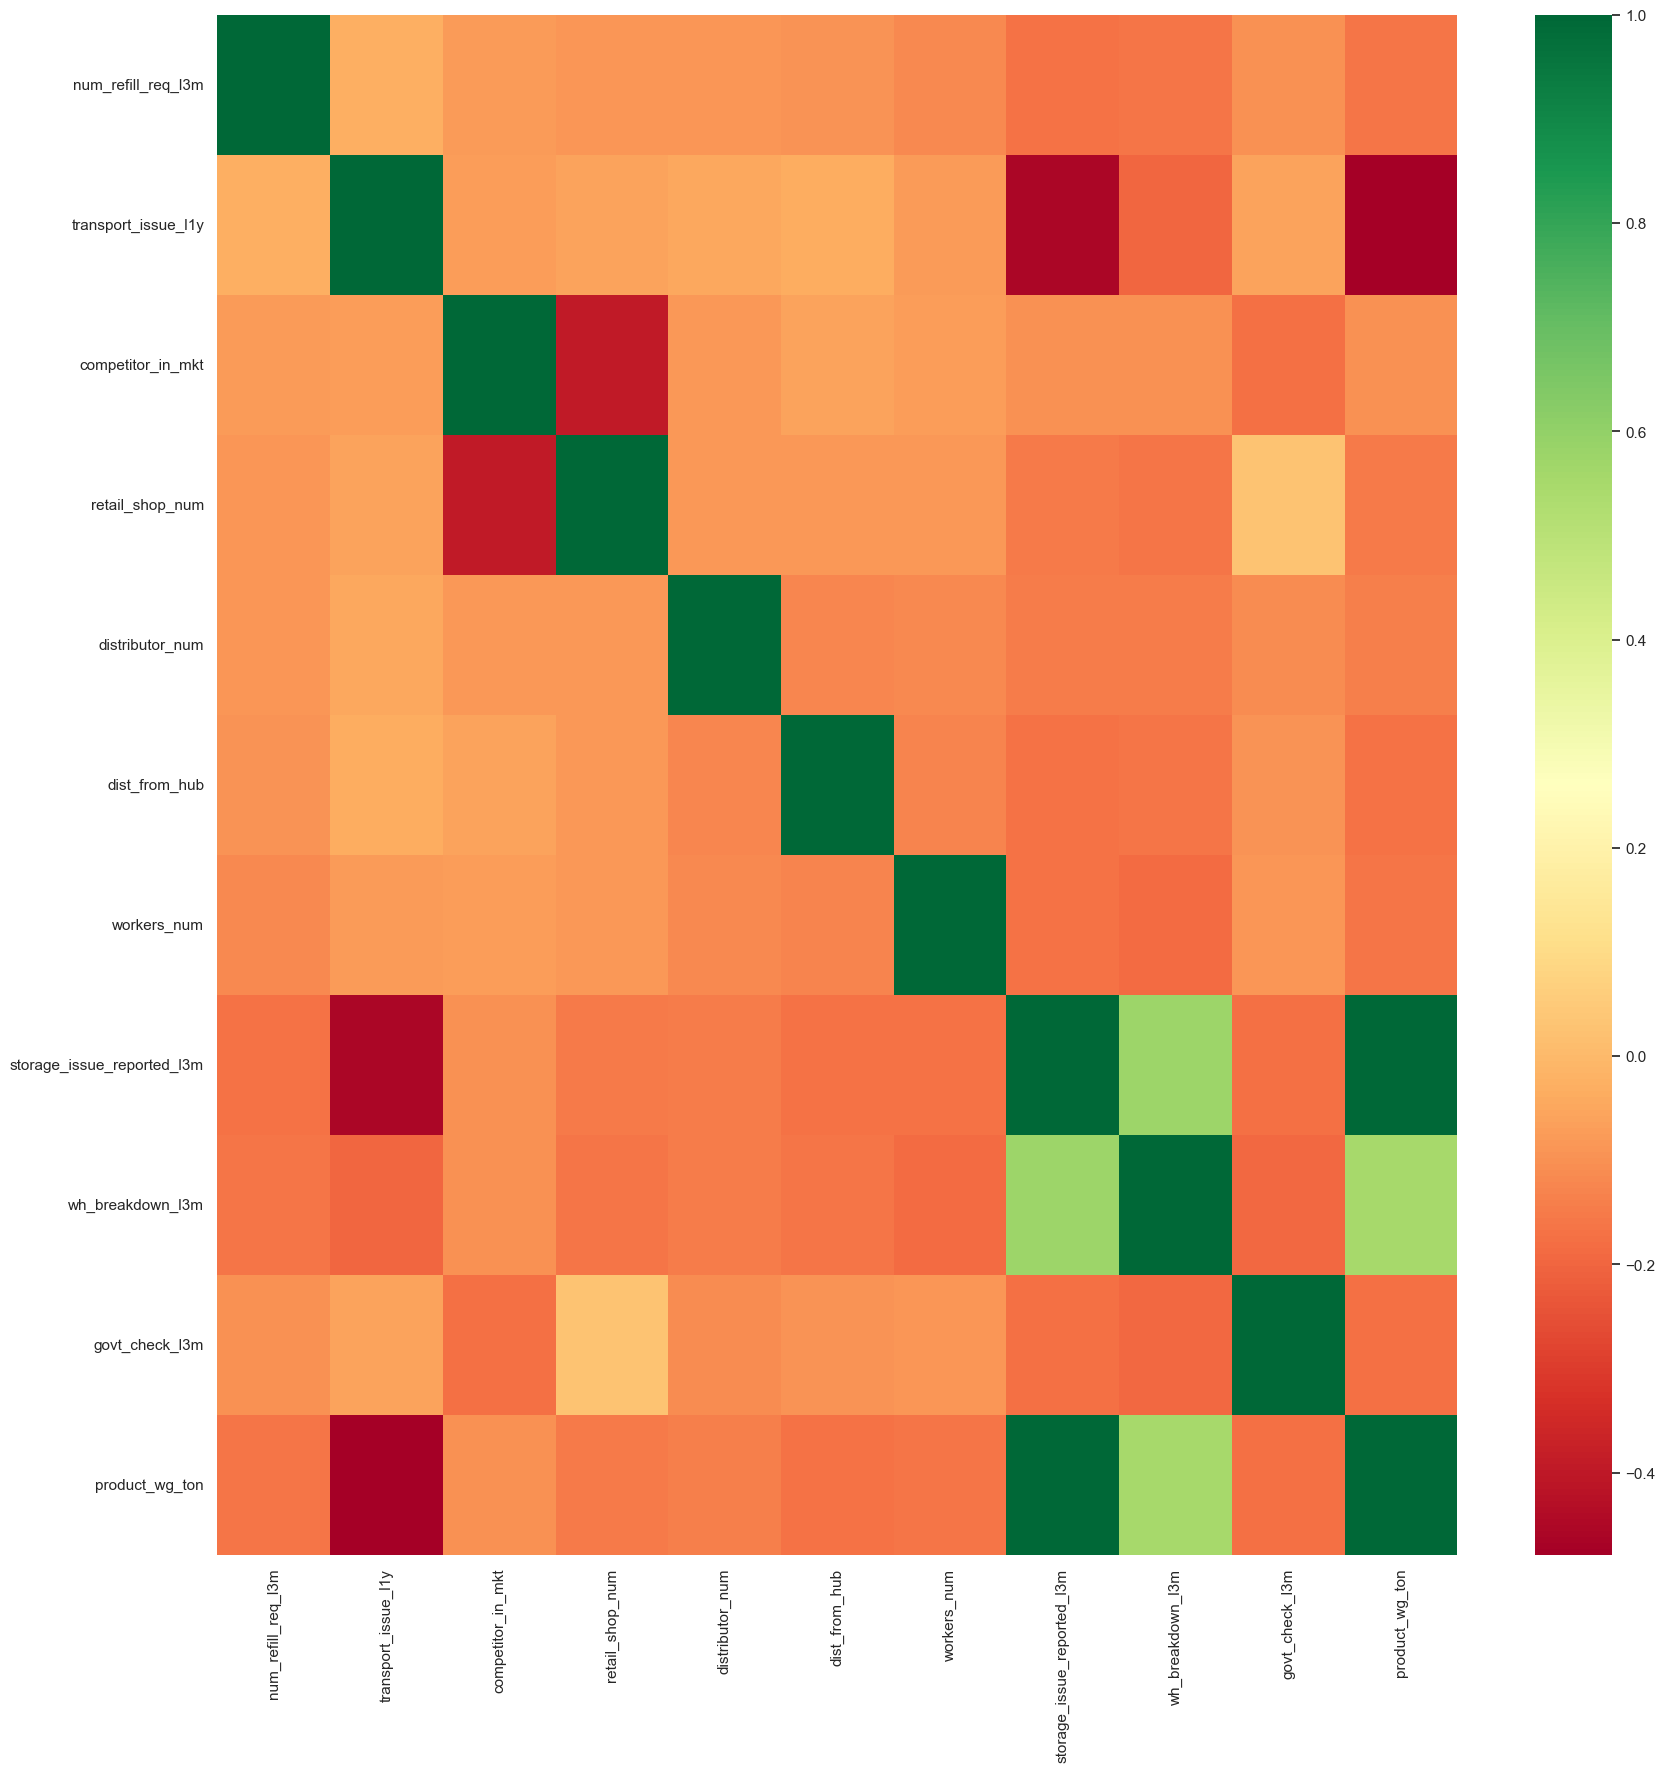

In [116]:
plt.figure(figsize = (20, 20))
sns.heatmap(fmcg_data.corr().corr(), cmap="RdYlGn")
plt.show()

## Model Building and Evaluation

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [118]:
# Dictionary which contains models for experiment
models = {
    "Linear Regression": LinearRegression(),
   
    "Gradient Booost":GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [119]:
def evaluate_reg(true, predicted):
    rmse = mean_squared_error(true, predicted, squared=False)
    r_score = r2_score(true, predicted)
    return rmse, r_score

In [120]:
def adjusted_r2(r2, n, p):
    # r2: R-squared value
    # n: Number of samples
    # p: Number of predictors (features)
    adjusted = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    return adjusted

In [121]:
def evaluate_models(X_train, y_train, X_test, y_test, models):
    
    results = []  # Store evaluation results
    trained_models = {}
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        trained_models[model_name] = model 
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
      
        # Train set performance
        model_train_rmse,model_train_r2_score = evaluate_reg(y_train, y_train_pred)
       
        n_train, p = X_train.shape[0], X_train.shape[1]
        model_train_adjusted_r2 = adjusted_r2(model_train_r2_score, n_train, p)
        
        # Test set performance
        model_test_rmse,model_test_r2_score  = evaluate_reg(y_test, y_test_pred)
       
        n_test = X_test.shape[0]
        model_test_adjusted_r2 = adjusted_r2(model_test_r2_score, n_test, p)
        
        # Set up k-fold cross-validation
        kfold = KFold(n_splits=5, shuffle=True, random_state=42)

        # Perform cross-validation and calculate R-squared scores
        scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

        # Calculate and print the average R-squared score
        avg_score = scores.mean()
        
        results.append({
            'Model': model_name,
            'Train RMSE': model_train_rmse,
            'Train R2 Score': model_train_r2_score,
            'Train Adjusted R2': model_train_adjusted_r2,
            'Test RMSE': model_test_rmse,
            'Test R2 Score': model_test_r2_score,
            'Test Adjusted R2': model_test_adjusted_r2,
            'Average Score': avg_score
        })
    return results,trained_models

In [122]:
final_results, linear_trained_models = evaluate_models(X_train_transformed,y_train,X_test_transformer,y_test, models)

In [123]:
linear_trained_models

{'Linear Regression': LinearRegression(),
 'Gradient Booost': GradientBoostingRegressor(random_state=42)}

In [124]:
pd.DataFrame(final_results)

Model   Train RMSE  Train R2 Score  Train Adjusted R2  \
0  Linear Regression  1757.396429        0.977117           0.977089   
1    Gradient Booost   927.833514        0.993622           0.993614   

     Test RMSE  Test R2 Score  Test Adjusted R2  Average Score  
0  1877.942031       0.973642          0.973510       0.977058  
1  1032.729705       0.992029          0.991989       0.993458

In [125]:
linear_trained_models = linear_trained_models['Linear Regression']
import dill
data1 = {"model":linear_trained_models}   
with open(r'C:\Users\reshm\OneDrive\Desktop\project\fmcg-supply chain\model_linear_object.joblib', 'wb') as file1:
    dill.dump(data1, file1)

In [126]:
import dill
# from sklearn.preprocessing import OrdinalEncoder

# # Assuming ordinal_encoder is the OrdinalEncoder fitted on X_train
# ordinal_encoder = OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1)
# X_train_or_encoded = ordinal_encoder.fit_transform(X_train[ordinal_columns])

# Save the fitted OrdinalEncoder and linear regression model
data2 = {"ordinal_encoder": ordinal_encoder}

with open(r'C:\Users\reshm\OneDrive\Desktop\project\fmcg-supply chain\ord_encoder_object.joblib', 'wb') as file2:
    dill.dump(data2, file2)

In [127]:
import dill

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train[numeric_columns])

data3 = {"scaler": scaler}

with open(r'C:\Users\reshm\OneDrive\Desktop\project\fmcg-supply chain\scaling_objects.joblib', 'wb') as file3:
    dill.dump(data3, file3)


In [128]:
import dill
# onehot_encoder = OneHotEncoder(sparse=False, drop="first", handle_unknown='ignore')
# X_train_encoded = onehot_encoder.fit_transform(X_train[ohe_categorical_columns])

data4 = {"OHE_encoder":onehot_encoder }

with open(r'C:\Users\reshm\OneDrive\Desktop\project\fmcg-supply chain\OHE_objects.joblib', 'wb') as file4:
    dill.dump(data4, file4)


In [129]:
X

location_type wh_capacity_size   zone wh_regional_zone  \
0             Urban            Small   West           Zone 6   
1             Rural            Large  North           Zone 5   
2             Rural              Mid  South           Zone 2   
3             Rural              Mid  North           Zone 3   
4             Rural            Large  North           Zone 5   
...             ...              ...    ...              ...   
24995         Rural            Small  North           Zone 1   
24996         Rural              Mid   West           Zone 2   
24997         Urban            Large  South           Zone 5   
24998         Rural            Small  North           Zone 1   
24999         Rural              Mid   West           Zone 4   

       num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
0                       3                    1                  2   
1                       0                    0                  4   
2                       1                    0                  4   
3                       7                    4                  2   
4                       3                    1                  2   
...                   ...                  ...                ...   
24995                   3                    0                  4   
24996                   6                    0                  4   
24997                   7                    0                  2   
24998                   1                    0                  2   
24999                   8                    2                  4   

       retail_shop_num  distributor_num flood_impacted flood_proof  \
0                 4651               24              0           1   
1                 6217               47              0           0   
2                 4306               64              0           0   
3                 6000               50              0           0   
4                 4740               42              1           0   
...                ...              ...            ...         ...   
24995             5390               19              0           0   
24996             4490               57              0           0   
24997             5403               31              1           0   
24998            10562               25              0           0   
24999             5664               21              0           1   

      electric_supply  dist_from_hub  workers_num  storage_issue_reported_l3m  \
0                   1             91         29.0                          13   
1                   1            210         31.0                           4   
2                   0            161         37.0                          17   
3                   0            103         21.0                          17   
4                   1            112         25.0                          18   
...               ...            ...          ...                         ...   
24995               1            142         34.0                          22   
24996               1            130         28.0                          10   
24997               1            147          NaN                          23   
24998               1             60         25.0                          18   
24999               1            239         39.0                           4   

      temp_reg_mach approved_wh_govt_certificate  wh_breakdown_l3m  \
0                 0                            A                 5   
1                 0                            A                 3   
2                 0                            A                 6   
3                 1                           A+                 3   
4                 0                            C                 6   
...             ...                          ...               ...   
24995             1                            A                 2   
24996             0               

In [130]:
X_client=pd.DataFrame(X.iloc[0, :]).T

In [131]:
X_client

location_type wh_capacity_size  zone wh_regional_zone num_refill_req_l3m  \
0         Urban            Small  West           Zone 6                  3   

  transport_issue_l1y competitor_in_mkt retail_shop_num distributor_num  \
0                   1                 2            4651              24   

  flood_impacted flood_proof electric_supply dist_from_hub workers_num  \
0              0           1               1            91        29.0   

  storage_issue_reported_l3m temp_reg_mach approved_wh_govt_certificate  \
0                         13             0                            A   

  wh_breakdown_l3m govt_check_l3m  
0                5             15

In [132]:
X_client[ordinal_columns] = ordinal_encoder.transform(X_client[ordinal_columns])

In [133]:
X_client

location_type  wh_capacity_size  zone wh_regional_zone num_refill_req_l3m  \
0         Urban               0.0  West           Zone 6                  3   

  transport_issue_l1y competitor_in_mkt retail_shop_num distributor_num  \
0                   1                 2            4651              24   

  flood_impacted flood_proof electric_supply dist_from_hub workers_num  \
0              0           1               1            91        29.0   

  storage_issue_reported_l3m temp_reg_mach  approved_wh_govt_certificate  \
0                         13             0                           3.0   

  wh_breakdown_l3m govt_check_l3m  
0                5             15

In [134]:
X_client.shape

(1, 19)

In [135]:
scaler

StandardScaler()

In [136]:
X_client[numeric_columns] 

num_refill_req_l3m transport_issue_l1y competitor_in_mkt retail_shop_num  \
0                  3                   1                 2            4651   

  distributor_num dist_from_hub workers_num storage_issue_reported_l3m  \
0              24            91        29.0                         13   

  wh_breakdown_l3m govt_check_l3m  
0                5             15

In [137]:
X_client[numeric_columns] = scaler.transform(X_client[numeric_columns])

In [138]:
numeric_columns

['num_refill_req_l3m',
 'transport_issue_l1y',
 'competitor_in_mkt',
 'retail_shop_num',
 'distributor_num',
 'dist_from_hub',
 'workers_num',
 'storage_issue_reported_l3m',
 'wh_breakdown_l3m',
 'govt_check_l3m']

In [139]:
X_client

location_type  wh_capacity_size  zone wh_regional_zone  num_refill_req_l3m  \
0         Urban               0.0  West           Zone 6           -0.421499   

   transport_issue_l1y  competitor_in_mkt  retail_shop_num  distributor_num  \
0             0.188592          -0.968314        -0.319972        -1.150193   

  flood_impacted flood_proof electric_supply  dist_from_hub  workers_num  \
0              0           1               1      -1.150611     0.002634   

   storage_issue_reported_l3m temp_reg_mach  approved_wh_govt_certificate  \
0                   -0.450995             0                           3.0   

   wh_breakdown_l3m  govt_check_l3m  
0           0.89901        -0.44605